# Data Exploration
Visualizing data and running classic statistics

In [1]:
import os
import sys
import pandas as pd
import yaml
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.stats import ttest_ind
import statsmodels.stats.multitest as multi

/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


#### Loading Data

In [2]:
# Getting back the objects:
with open('../config/lists_radio.pkl', 'rb') as f:
    id_cols_radio,var_cols_radio,time_points,delta_time = pickle.load(f)

with open('../config/lists_path.pkl', 'rb') as f:
    id_cols_path,var_cols_path = pickle.load(f)
    
with open('../config/lists_imm.pkl', 'rb') as f:
    id_cols_imm,var_cols_imm = pickle.load(f)

id_cols = id_cols_radio + id_cols_path + id_cols_imm + ['Class_name']
var_cols = var_cols_radio + var_cols_path + var_cols_imm
    
#Retreive local data path
with open('../config/paths.yaml','r') as file:
    paths_list = yaml.safe_load(file)
    PATH = os.path.abspath(paths_list['PATH'])
    SCRIPT_DIR = os.path.abspath(paths_list['SCRIPT_DIR'])

In [3]:
data_deltaOnly = pd.read_csv(os.path.join(PATH,'tables','data_merge246.csv'))
data_deltaOnly.groupby(['StudyDay','Class_name']).describe()

Abolute_Neutrophil                                    \
                                 count      mean       std   min     25%   
StudyDay Class_name                                                        
2_delta  Infected                 12.0 -0.545000  3.357695 -6.32 -1.7525   
         Mock                      8.0  0.312500  1.315042 -1.05 -0.6200   
4_delta  Infected                 12.0 -1.158333  2.269893 -7.35 -1.4875   
         Mock                      8.0  0.230000  2.115555 -2.86 -1.3350   
6_delta  Infected                 12.0 -1.326667  1.925042 -6.35 -1.5650   
         Mock                      8.0  0.182500  1.349473 -1.23 -0.8325   

                                         Absolute_Basophil            ...  \
                       50%     75%   max             count      mean  ...   
StudyDay Class_name                                                   ...   
2_delta  Infected   -1.315  0.0150  7.62              12.0 -0.008333  ...   
         Mock       -0.180  1.3525  2.36               8.0  0.007500  ...   
4_delta  Infected   -0.790  0.4525  1.04              12.0 -0.008333  ...   
         Mock        0.585  1.3300  3.59               8.0  0.001250  ...   
6_delta  Infected   -0.975 -0.2450  0.77              12.0 -0.005833  ...   
         Mock       -0.365  1.1925  2.50               8.0  0.002500  ...   

                        VEGF         sCD40L                                   \
                         75%     max  count        mean          std     min   
StudyDay Class_name                                                            
2_delta  Infected     7.3125   25.89   12.0  821.501667  2017.645788  -71.86   
         Mock        16.8300   22.22    8.0  150.262500   315.301617   -3.45   
4_delta  Infected     4.2925   41.94   12.0    8.404167   233.337344 -324.24   
         Mock         9.0650   20.79    8.0   80.880000   113.001229   -4.46   
6_delta  Infected    18.4250  280.70   12.0  211.788333   467.117429  -48.81   
         Mock         0.8425  175.14    8.0   27.232500    80.561247  -71.40   

                                                         
                         25%     50%       75%      max  
StudyDay Class_name                                      
2_delta  Infected   -27.2775   1.020  188.8500  6757.06  
         Mock        11.4775  30.255   71.2225   919.00  
4_delta  Infected   -39.0575 -16.050    0.7600   689.80  
         Mock         3.9150  33.940  109.3675   321.87  
6_delta  Infected    -8.7200   2.350  180.5425  1590.27  
         Mock        -7.9025   0.865   38.4750   187.60  

[6 rows x 1472 columns]

### Plot Mock vs. Infected

In [4]:
data_plot = data_deltaOnly.groupby(['StudyDay','Class_name'])

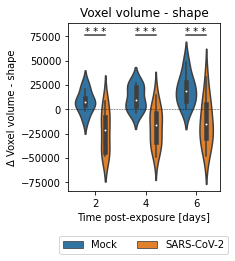

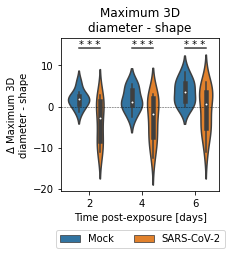

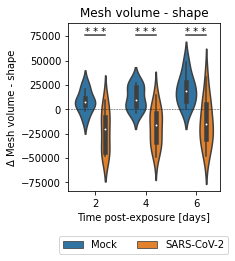

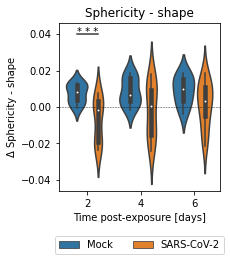

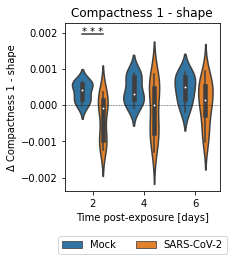

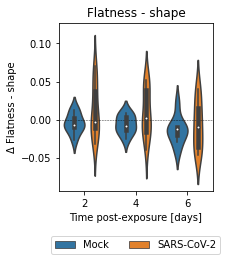

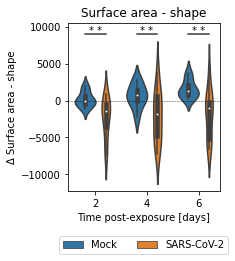

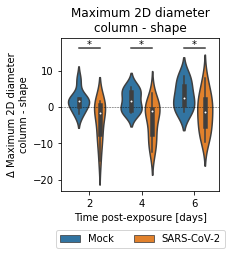

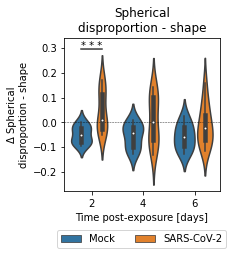

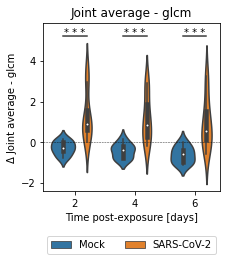

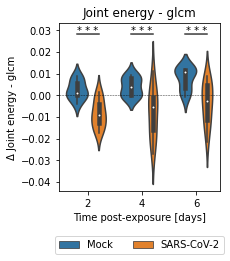

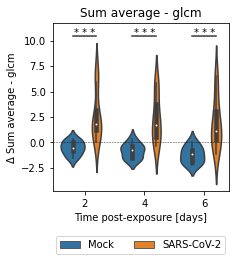

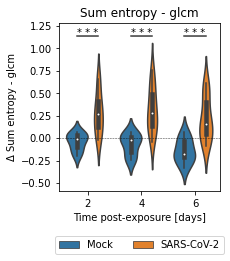

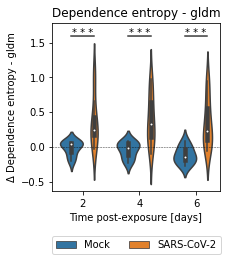

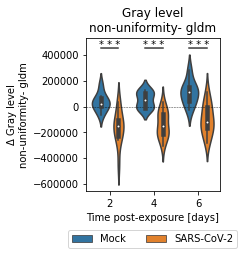

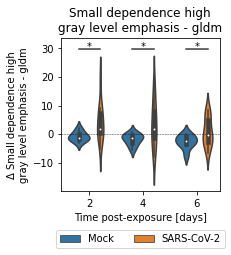

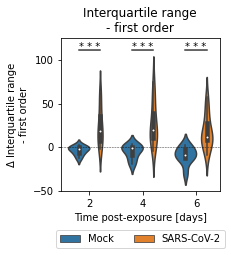

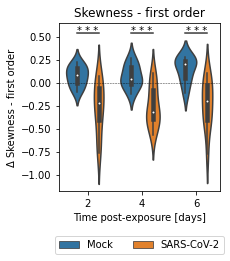

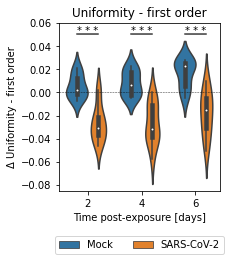

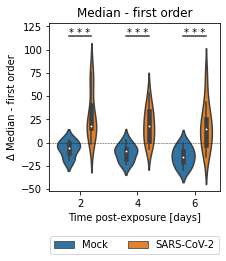

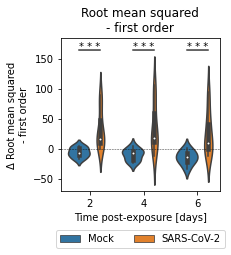

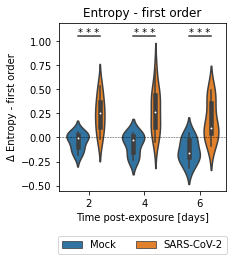

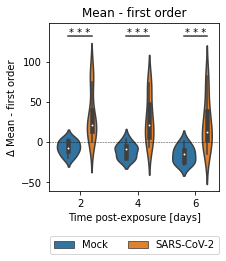

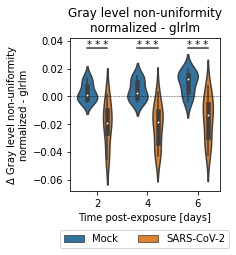

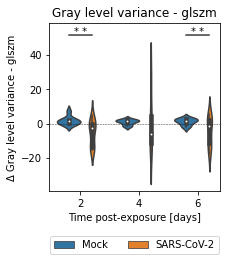

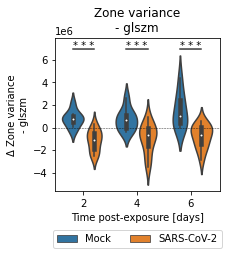

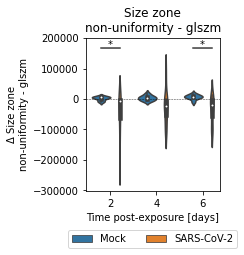

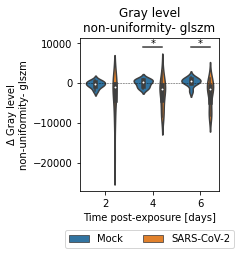

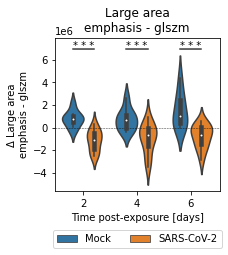

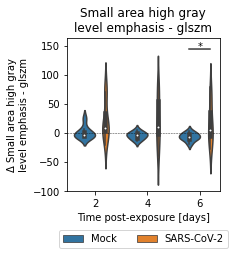

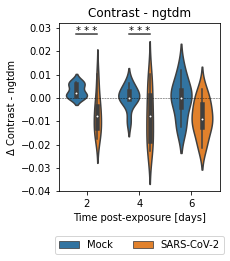

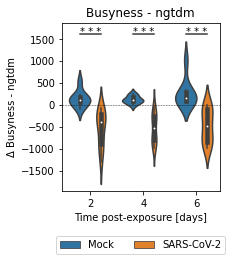

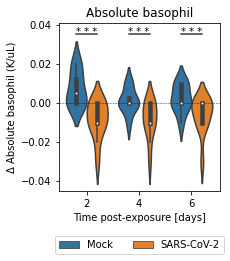

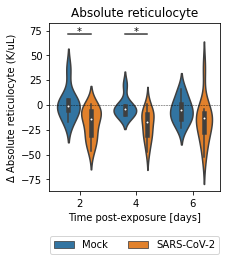

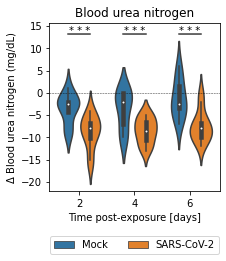

In [5]:
if True:
    with open('../config/pretty_names.yaml','r') as file:
        rename_dict = yaml.safe_load(file)

    # Change y-axis labels
    data_deltaOnly['plot_StudyDay'] = data_deltaOnly['StudyDay'].replace({'2_delta':2,'4_delta':4,'6_delta':6},inplace=False)
    data_deltaOnly['plot_Class_name'] = data_deltaOnly['Class_name'].replace({'Infected':'SARS-CoV-2'},inplace=False)

    for var in var_cols:

        fig = plt.figure(figsize=[3.25,4])
        ax2 = fig.add_subplot()
        
        # Plot 0 reference line
        ax2.axhline(color='black',linestyle='dashed',linewidth=0.5,alpha=0.8)
        
        # Violin plots
        ax2 = sns.violinplot(y=var,x='plot_StudyDay',hue='plot_Class_name',hue_order=['Mock','SARS-CoV-2'],data=data_deltaOnly[[var,'plot_StudyDay','plot_Class_name']])

        # Plot significance bars
        plt.setp(ax2.artists, edgecolor = 'k')
        y_ax_max = ax2.get_ylim()[1]

        def sig_bar(pval, x1, x2, y1, h):
            # plot bar
            ax2=sns.lineplot(x=[x1,x1, x2, x2], y=[y1, y1+h, y1+h, y1],color='#3f3f3fff')

            #plot_asterisks
            if day_2_pval < 0.005:
                ax2.text((x1+x2)/2, y1+h,"* * *",ha='center',fontsize='medium')
            elif day_2_pval < 0.01:
                ax2.text((x1+x2)/2, y1+h,"* *",ha='center',fontsize='medium')
            else:
                ax2.text((x1+x2)/2, y1+h,"*",ha='center',fontsize='medium')

        # run btwn group ttest for day 2
        day_2_pval = ttest_ind(data_deltaOnly.loc[(data_deltaOnly.plot_Class_name == 'SARS-CoV-2') & (data_deltaOnly.StudyDay == '2_delta'),var],
                               data_deltaOnly.loc[(data_deltaOnly.plot_Class_name == 'Mock') & (data_deltaOnly.StudyDay == '2_delta'),var],equal_var=False)[1]
        
        # plot significance asterisks
        if day_2_pval < 0.05:
            sig_bar(day_2_pval, 0.2, -0.2, y_ax_max, 0)

        # run btwn group ttest for day 4
        day_4_pval = ttest_ind(data_deltaOnly.loc[(data_deltaOnly.plot_Class_name == 'SARS-CoV-2') & (data_deltaOnly.StudyDay == '4_delta'),var],
                               data_deltaOnly.loc[(data_deltaOnly.plot_Class_name == 'Mock') & (data_deltaOnly.StudyDay == '4_delta'),var],equal_var=False)[1]
        if day_4_pval < 0.05:
            sig_bar(day_2_pval, 0.8, 1.2, y_ax_max, 0)

        # run btwn group ttest for day 6
        day_6_pval = ttest_ind(data_deltaOnly.loc[(data_deltaOnly.plot_Class_name == 'SARS-CoV-2') & (data_deltaOnly.StudyDay == '6_delta'),var],
                               data_deltaOnly.loc[(data_deltaOnly.plot_Class_name == 'Mock') & (data_deltaOnly.StudyDay == '6_delta'),var],equal_var=False)[1]
        if day_6_pval < 0.05:
            sig_bar(day_2_pval, 1.8, 2.2, y_ax_max, 0)

        #add some more space for the significance labels
        ax2.set_ylim(top=ax2.get_ylim()[1]+ax2.get_ylim()[1]/20)

        # Put a legend below the axis
        ax2.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.4))
        
        # Add labels
        if var in rename_dict:
            ax2.set_ylabel('\u0394 '+ bytes(rename_dict[var], "utf-8").decode("unicode_escape"))
            ax2.set_title(bytes(rename_dict[var], "utf-8").decode("unicode_escape").split(' (')[0])
        else:
            ax2.set_ylabel('\u0394 '+var.replace('_',' '))
            ax2.set_title(var.replace('_',' '))
        ax2.set_xlabel('Time post-exposure [days]')
        
        # Save plots
        fig.tight_layout()
        if var in rename_dict:
            fig.savefig(os.path.join(PATH,'figures','btwn_group4',var+'.png'), bbox_inches="tight",dpi=300)
            plt.show(fig)
        plt.close(fig)

### Plot the correlation matrix

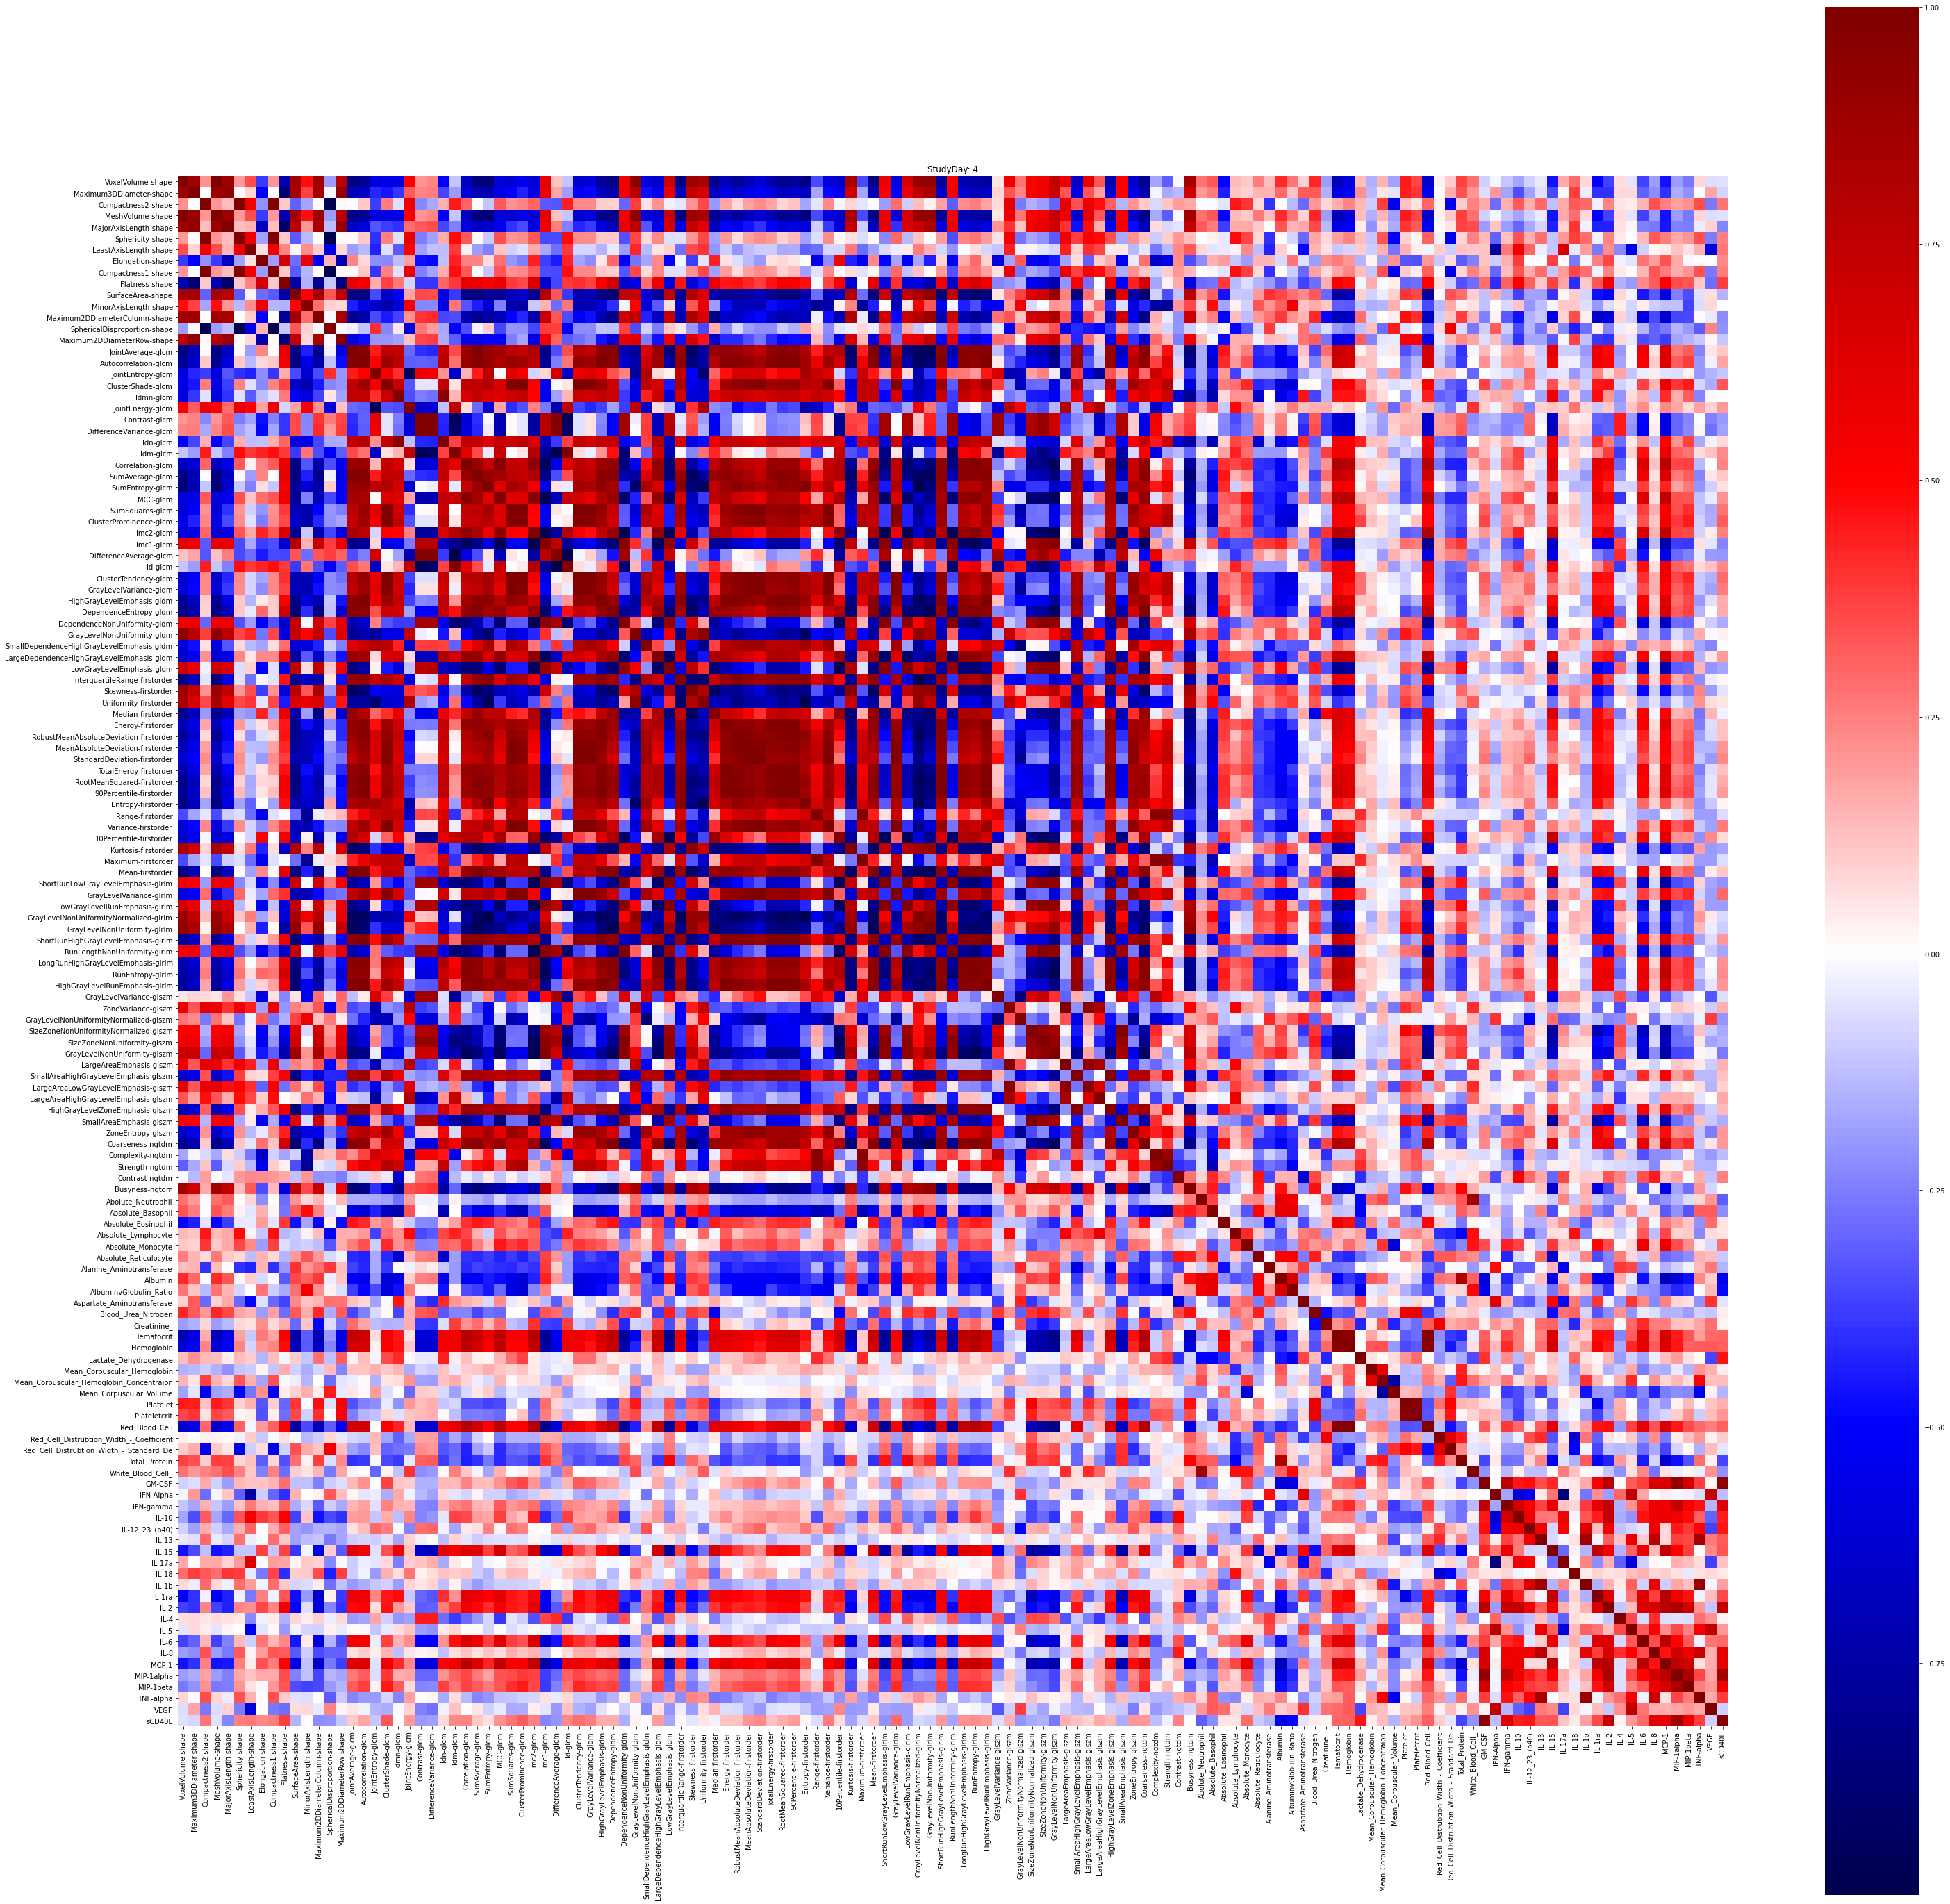

In [6]:
if True:
    # Calculate correlations (follows order of var_cols)
    data_corr = data_deltaOnly.loc[data_deltaOnly['StudyDay'] == '4_delta'].set_index('Subject').drop('StudyDay',axis=1)[var_cols].corr(method='pearson')
    
    # Plot correlation matrix in a heatmap
    fig, axs = plt.subplots(figsize=(50,50),facecolor='white')
    sns.heatmap(data_corr,cmap='seismic',square=True,ax=axs)
    # Set labels
    axs.set_title('StudyDay: 4')
    fig.savefig(os.path.join(PATH,'figures','CorrelationMatrix.png'),dpi=300)
    plt.show()
    data_corr.to_csv(os.path.join(PATH,'tables','corr_matrix.csv'))

### Run a (Class x StudyDay) Repeated Measures ANOVA on each variable

In [7]:
# Initialize datafames for storing results
fTest_pvals=pd.DataFrame(columns = ['Class_name','StudyDay','Interaction']) #store p-vals
fTest_np2=pd.DataFrame(columns = ['Class_name','StudyDay','Interaction']) #store partial eta squared
SARSvMock_mean=pd.DataFrame(columns = ['Source','SARS-Mock_mean']) #store mean difference

for var in var_cols:
    print("-- "+var+" --")
    # Calculate the difference in means averaging across time
    mean_diff = data_deltaOnly.loc[data_deltaOnly.Class_name == 'Infected',var].mean()-data_deltaOnly.loc[data_deltaOnly.Class_name == 'Mock',var].mean()

    # Save direction
    print('mean_diff:', mean_diff)
    if mean_diff > 0:
        SARSvMock_mean = SARSvMock_mean.append({'Source':var,'SARS-Mock_mean':'SARS>Mock'},ignore_index=True)
    else:
        SARSvMock_mean = SARSvMock_mean.append({'Source':var,'SARS-Mock_mean':'SARS<Mock'},ignore_index=True)
    
    # Run ANOVA
    try:
        anova_results = pg.mixed_anova(data=data_deltaOnly,dv=var,between='Class_name',within='StudyDay',subject='Subject')
    except:
        e = sys.exc_info()[0]
        print( "<p>Error: %s</p>" % e )
    else:
        # Display results
        display(anova_results)
        display(anova_results.set_index('Source')[['p-unc']].loc[['Class_name','StudyDay','Interaction']].transpose().rename({'p-unc':var}))
        # Store results
        fTest_pvals=fTest_pvals.append(anova_results.set_index('Source')[['p-unc']].loc[['Class_name','StudyDay','Interaction']].transpose().rename({'p-unc':var}),verify_integrity=True)
        fTest_np2=fTest_np2.append(anova_results.set_index('Source')[['np2']].loc[['Class_name','StudyDay','Interaction']].transpose().rename({'np2':var}),verify_integrity=True)
    print("------------------------------------------------")

-- VoxelVolume-shape --
mean_diff: -31268.28115833333


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,1.407896e+10,1,18,1.407896e+10,16.573097,0.000717,NaN,0.479364,NaN,NaN,NaN,NaN
1,StudyDay,1.057763e+09,2,36,5.288814e+08,5.246101,0.010014,0.015511,0.225677,0.755387,False,0.676174,0.029548
2,Interaction,4.485423e+07,2,36,2.242711e+07,0.222460,0.801639,NaN,0.012208,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
VoxelVolume-shape,0.000717,0.010014,0.801639


------------------------------------------------
-- Maximum3DDiameter-shape --
mean_diff: -4.983699290277777


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,357.656524,1,18,357.656524,6.588465,0.019405,NaN,0.267949,NaN,NaN,NaN,NaN
1,StudyDay,66.881947,2,36,33.440974,11.311271,0.000154,0.000581,0.385902,0.752863,False,0.671737,0.027848
2,Interaction,3.408352,2,36,1.704176,0.576431,0.567002,NaN,0.031030,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Maximum3DDiameter-shape,0.019405,0.000154,0.567002


------------------------------------------------
-- Compactness2-shape --
mean_diff: -0.005116637833333333


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.000377,1,18,0.000377,6.143769,0.023318,0.254466,NaN
1,StudyDay,0.000076,2,36,0.000038,3.660535,0.035716,0.168996,0.864972
2,Interaction,0.000023,2,36,0.000012,1.121177,0.337009,0.058635,NaN


Source,Class_name,StudyDay,Interaction
Compactness2-shape,0.023318,0.035716,0.337009


------------------------------------------------
-- MeshVolume-shape --
mean_diff: -31287.32053055555


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,1.409611e+10,1,18,1.409611e+10,16.572747,0.000717,NaN,0.479359,NaN,NaN,NaN,NaN
1,StudyDay,1.056432e+09,2,36,5.282162e+08,5.241381,0.010051,0.015528,0.225519,0.7562,False,0.677599,0.030113
2,Interaction,4.511214e+07,2,36,2.255607e+07,0.223819,0.800564,NaN,0.012282,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
MeshVolume-shape,0.000717,0.010051,0.800564


------------------------------------------------
-- MajorAxisLength-shape --
mean_diff: -3.7349731398611086


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,200.880351,1,18,200.880351,5.306939,0.033379,NaN,0.227698,NaN,NaN,NaN,NaN
1,StudyDay,47.042140,2,36,23.521070,10.459754,0.000262,0.000749,0.367528,0.758659,False,0.681884,0.031871
2,Interaction,0.506940,2,36,0.253470,0.112717,0.893717,NaN,0.006223,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
MajorAxisLength-shape,0.033379,0.000262,0.893717


------------------------------------------------
-- Sphericity-shape --
mean_diff: -0.010690730166666688


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.001646,1,18,0.001646,6.169221,0.023072,0.255251,NaN
1,StudyDay,0.000345,2,36,0.000172,3.290452,0.048705,0.154551,0.815698
2,Interaction,0.000120,2,36,0.000060,1.146046,0.329216,0.059858,NaN


Source,Class_name,StudyDay,Interaction
Sphericity-shape,0.023072,0.048705,0.329216


------------------------------------------------
-- LeastAxisLength-shape --
mean_diff: -0.8646694893055561


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,10.766208,1,18,10.766208,8.740090,0.008449,NaN,0.326853,NaN,NaN,NaN,NaN
1,StudyDay,0.238997,2,36,0.119498,0.192878,0.825429,0.756136,0.010602,0.744142,False,0.65617,0.02255
2,Interaction,0.641894,2,36,0.320947,0.518028,0.600067,NaN,0.027974,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
LeastAxisLength-shape,0.008449,0.825429,0.600067


------------------------------------------------
-- Elongation-shape --
mean_diff: 0.009618772972222224


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.001332,1,18,0.001332,0.342556,0.565623,0.018676,NaN
1,StudyDay,0.002814,2,36,0.001407,5.067648,0.011504,0.219686,0.886587
2,Interaction,0.002171,2,36,0.001086,3.910614,0.029048,0.178480,NaN


Source,Class_name,StudyDay,Interaction
Elongation-shape,0.565623,0.011504,0.029048


------------------------------------------------
-- Compactness1-shape --
mean_diff: -0.0005368796944444447


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,4.150653e-06,1,18,4.150653e-06,6.190047,0.022872,0.255892,NaN
1,StudyDay,8.597495e-07,2,36,4.298748e-07,3.387130,0.044891,0.158372,0.828833
2,Interaction,2.901948e-07,2,36,1.450974e-07,1.143272,0.330076,0.059722,NaN


Source,Class_name,StudyDay,Interaction
Compactness1-shape,0.022872,0.044891,0.330076


------------------------------------------------
-- Flatness-shape --
mean_diff: 0.013011247972222202


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.002438,1,18,0.002438,1.279729,0.272797,0.066377,NaN
1,StudyDay,0.002503,2,36,0.001252,12.552517,0.000073,0.410851,0.951593
2,Interaction,0.000247,2,36,0.000123,1.236191,0.302525,0.064264,NaN


Source,Class_name,StudyDay,Interaction
Flatness-shape,0.272797,0.000073,0.302525


------------------------------------------------
-- SurfaceArea-shape --
mean_diff: -2956.1278936111107


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,1.258372e+08,1,18,1.258372e+08,7.692725,0.012525,NaN,0.299413,NaN,NaN,NaN,NaN
1,StudyDay,6.043058e+06,2,36,3.021529e+06,2.030428,0.146043,0.158671,0.101367,0.737853,False,0.644716,0.019245
2,Interaction,2.790364e+06,2,36,1.395182e+06,0.937544,0.400940,NaN,0.049507,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
SurfaceArea-shape,0.012525,0.146043,0.40094


------------------------------------------------
-- MinorAxisLength-shape --
mean_diff: -1.9301548456944448


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,53.647167,1,18,53.647167,4.992950,0.038371,0.217151,NaN
1,StudyDay,1.133910,2,36,0.566955,0.389449,0.680250,0.021178,0.886283
2,Interaction,15.091403,2,36,7.545701,5.183242,0.010514,0.223577,NaN


Source,Class_name,StudyDay,Interaction
MinorAxisLength-shape,0.038371,0.68025,0.010514


------------------------------------------------
-- Maximum2DDiameterColumn-shape --
mean_diff: -5.028562488888899


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,364.124746,1,18,364.124746,6.601463,0.019303,NaN,0.268336,NaN,NaN,NaN,NaN
1,StudyDay,45.892681,2,36,22.946341,6.213795,0.004806,0.009573,0.256622,0.722521,False,0.615956,0.012763
2,Interaction,2.159711,2,36,1.079855,0.292421,0.748210,NaN,0.015986,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Maximum2DDiameterColumn-shape,0.019303,0.004806,0.74821


------------------------------------------------
-- SphericalDisproportion-shape --
mean_diff: 0.06805420279166671


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,0.066692,1,18,0.066692,5.918952,0.025633,NaN,0.247459,NaN,NaN,NaN,NaN
1,StudyDay,0.014819,2,36,0.007410,2.893491,0.068345,0.085254,0.138488,0.760555,False,0.685171,0.033281
2,Interaction,0.005817,2,36,0.002909,1.135862,0.332384,NaN,0.059358,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
SphericalDisproportion-shape,0.025633,0.068345,0.332384


------------------------------------------------
-- Maximum2DDiameterRow-shape --
mean_diff: -3.5013974527777756


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,176.540891,1,18,176.540891,3.671093,0.071385,NaN,0.169400,NaN,NaN,NaN,NaN
1,StudyDay,65.107355,2,36,32.553678,10.772829,0.000215,0.000864,0.374410,0.742351,False,0.652929,0.021567
2,Interaction,4.891028,2,36,2.445514,0.809282,0.453112,NaN,0.043026,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Maximum2DDiameterRow-shape,0.071385,0.000215,0.453112


------------------------------------------------
-- JointAverage-glcm --
mean_diff: 1.5780846622777776


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,35.861057,1,18,35.861057,14.447535,0.001308,NaN,0.445258,NaN,NaN,NaN,NaN
1,StudyDay,1.309751,2,36,0.654876,5.062246,0.011553,0.019735,0.219504,0.692855,False,0.556696,0.005135
2,Interaction,0.005275,2,36,0.002637,0.020387,0.979830,NaN,0.001131,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
JointAverage-glcm,0.001308,0.011553,0.97983


------------------------------------------------
-- Autocorrelation-glcm --
mean_diff: 33.96313518402777


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,16610.321542,1,18,16610.321542,10.762900,0.004155,NaN,0.374194,NaN,NaN,NaN,NaN
1,StudyDay,467.529560,2,36,233.764780,2.306817,0.114117,0.128141,0.113598,0.687651,False,0.545774,0.004296
2,Interaction,107.414187,2,36,53.707094,0.529988,0.593134,NaN,0.028602,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Autocorrelation-glcm,0.004155,0.114117,0.593134


------------------------------------------------
-- JointEntropy-glcm --
mean_diff: 0.4055010284583328


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,2.367808,1,18,2.367808,18.130532,0.000473,0.501806,NaN
1,StudyDay,0.328257,2,36,0.164129,3.313722,0.047757,0.155474,0.7815
2,Interaction,0.019473,2,36,0.009737,0.196583,0.822409,0.010803,NaN


Source,Class_name,StudyDay,Interaction
JointEntropy-glcm,0.000473,0.047757,0.822409


------------------------------------------------
-- ClusterShade-glcm --
mean_diff: 953.7270562388892


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,1.309817e+07,1,18,1.309817e+07,2.398427,0.138860,NaN,0.117579,NaN,NaN,NaN,NaN
1,StudyDay,4.212392e+06,2,36,2.106196e+06,3.407096,0.044143,0.074854,0.159157,0.708903,False,0.58937,0.00858
2,Interaction,3.282862e+06,2,36,1.641431e+06,2.655267,0.084014,NaN,0.128552,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
ClusterShade-glcm,0.13886,0.044143,0.084014


------------------------------------------------
-- Idmn-glcm --
mean_diff: 0.002610516402777758


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,9.813306e-05,1,18,9.813306e-05,23.207930,0.000138,0.563191,NaN
1,StudyDay,2.545050e-06,2,36,1.272525e-06,0.962174,0.391669,0.050742,0.777281
2,Interaction,3.461123e-07,2,36,1.730561e-07,0.130850,0.877765,0.007217,NaN


Source,Class_name,StudyDay,Interaction
Idmn-glcm,0.000138,0.391669,0.877765


------------------------------------------------
-- JointEnergy-glcm --
mean_diff: -0.011561021555555556


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.001925,1,18,0.001925,14.457662,0.001305,0.445431,NaN
1,StudyDay,0.000301,2,36,0.000151,5.985277,0.005700,0.249540,0.945472
2,Interaction,0.000002,2,36,0.000001,0.049467,0.951802,0.002741,NaN


Source,Class_name,StudyDay,Interaction
JointEnergy-glcm,0.001305,0.0057,0.951802


------------------------------------------------
-- Contrast-glcm --
mean_diff: -0.8823939398333336


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,11.212115,1,18,11.212115,0.833350,0.373371,NaN,0.044249,NaN,NaN,NaN,NaN
1,StudyDay,10.527961,2,36,5.263980,0.954869,0.394394,0.360271,0.050376,0.730443,False,0.630969,0.015851
2,Interaction,3.560745,2,36,1.780372,0.322954,0.726083,NaN,0.017626,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Contrast-glcm,0.373371,0.394394,0.726083


------------------------------------------------
-- DifferenceVariance-glcm --
mean_diff: -0.7520676111805554


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,8.144722,1,18,8.144722,1.622700,0.218919,NaN,0.082695,NaN,NaN,NaN,NaN
1,StudyDay,3.545787,2,36,1.772894,0.861741,0.430956,0.390319,0.045687,0.728801,False,0.627883,0.015167
2,Interaction,1.257218,2,36,0.628609,0.305545,0.738614,NaN,0.016691,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
DifferenceVariance-glcm,0.218919,0.430956,0.738614


------------------------------------------------
-- Idn-glcm --
mean_diff: 0.0070952523888888844


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.000725,1,18,0.000725,13.267848,0.001862,0.424329,NaN
1,StudyDay,0.000017,2,36,0.000008,0.547379,0.583202,0.029512,0.791097
2,Interaction,0.000003,2,36,0.000001,0.088377,0.915614,0.004886,NaN


Source,Class_name,StudyDay,Interaction
Idn-glcm,0.001862,0.583202,0.915614


------------------------------------------------
-- Idm-glcm --
mean_diff: 0.0003530135277777999


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.000002,1,18,0.000002,0.000386,0.984548,0.000021,NaN
1,StudyDay,0.002126,2,36,0.001063,1.683000,0.200107,0.085505,0.769515
2,Interaction,0.000406,2,36,0.000203,0.321485,0.727131,0.017547,NaN


Source,Class_name,StudyDay,Interaction
Idm-glcm,0.984548,0.200107,0.727131


------------------------------------------------
-- Correlation-glcm --
mean_diff: 0.08316631406944447


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.099600,1,18,0.099600,4.515652,0.047690,0.200556,NaN
1,StudyDay,0.007177,2,36,0.003589,2.711926,0.079972,0.130935,0.672416
2,Interaction,0.005576,2,36,0.002788,2.106776,0.136377,0.104779,NaN


Source,Class_name,StudyDay,Interaction
Correlation-glcm,0.04769,0.079972,0.136377


------------------------------------------------
-- SumAverage-glcm --
mean_diff: 3.156169325555556


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,143.444229,1,18,143.444229,14.447535,0.001308,NaN,0.445258,NaN,NaN,NaN,NaN
1,StudyDay,5.239005,2,36,2.619502,5.062246,0.011553,0.019735,0.219504,0.692855,False,0.556696,0.005135
2,Interaction,0.021099,2,36,0.010550,0.020387,0.979830,NaN,0.001131,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
SumAverage-glcm,0.001308,0.011553,0.97983


------------------------------------------------
-- SumEntropy-glcm --
mean_diff: 0.3534431724027781


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,1.798878,1,18,1.798878,18.226993,0.000461,NaN,0.503133,NaN,NaN,NaN,NaN
1,StudyDay,0.094142,2,36,0.047071,4.118119,0.024515,0.036785,0.186188,0.708125,False,0.587819,0.008379
2,Interaction,0.010276,2,36,0.005138,0.449510,0.641472,NaN,0.024364,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
SumEntropy-glcm,0.000461,0.024515,0.641472


------------------------------------------------
-- MCC-glcm --
mean_diff: 0.0950398486388889


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.130069,1,18,0.130069,5.036311,0.037633,0.218625,NaN
1,StudyDay,0.001723,2,36,0.000861,0.607992,0.549938,0.032674,0.83996
2,Interaction,0.001371,2,36,0.000686,0.483879,0.620339,0.026178,NaN


Source,Class_name,StudyDay,Interaction
MCC-glcm,0.037633,0.549938,0.620339


------------------------------------------------
-- SumSquares-glcm --
mean_diff: 7.184978335833335


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,743.384357,1,18,743.384357,3.771038,0.067964,NaN,0.173214,NaN,NaN,NaN,NaN
1,StudyDay,143.860335,2,36,71.930168,2.777955,0.075519,0.106344,0.133697,0.693131,False,0.557272,0.005183
2,Interaction,106.149127,2,36,53.074564,2.049748,0.143531,NaN,0.102233,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
SumSquares-glcm,0.067964,0.075519,0.143531


------------------------------------------------
-- ClusterProminence-glcm --
mean_diff: 56737.62590472223


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,4.635588e+10,1,18,4.635588e+10,2.561672,0.126887,NaN,0.124585,NaN,NaN,NaN,NaN
1,StudyDay,1.441326e+10,2,36,7.206628e+09,3.252744,0.050285,0.083282,0.153051,0.680658,False,0.530832,0.003347
2,Interaction,1.105949e+10,2,36,5.529746e+09,2.495876,0.096585,NaN,0.121775,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
ClusterProminence-glcm,0.126887,0.050285,0.096585


------------------------------------------------
-- Imc2-glcm --
mean_diff: 0.08079052769444442


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.093990,1,18,0.093990,3.985763,0.061239,0.181288,NaN
1,StudyDay,0.000304,2,36,0.000152,0.177368,0.838199,0.009758,0.789813
2,Interaction,0.001561,2,36,0.000780,0.911125,0.411143,0.048179,NaN


Source,Class_name,StudyDay,Interaction
Imc2-glcm,0.061239,0.838199,0.411143


------------------------------------------------
-- Imc1-glcm --
mean_diff: -0.04854102026388888


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.033930,1,18,0.033930,3.892428,0.064063,0.177798,NaN
1,StudyDay,0.000287,2,36,0.000144,0.365448,0.696430,0.019899,0.781901
2,Interaction,0.000803,2,36,0.000402,1.021413,0.370284,0.053698,NaN


Source,Class_name,StudyDay,Interaction
Imc1-glcm,0.064063,0.69643,0.370284


------------------------------------------------
-- DifferenceAverage-glcm --
mean_diff: -0.02835054522222228


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,0.011574,1,18,0.011574,0.097401,0.758557,NaN,0.005382,NaN,NaN,NaN,NaN
1,StudyDay,0.096764,2,36,0.048382,1.297578,0.285663,0.270024,0.067240,0.736811,False,0.642801,0.018736
2,Interaction,0.024249,2,36,0.012124,0.325166,0.724507,NaN,0.017744,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
DifferenceAverage-glcm,0.758557,0.285663,0.724507


------------------------------------------------
-- Id-glcm --
mean_diff: 0.0002468803472221986


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,8.776786e-07,1,18,8.776786e-07,0.000273,0.987010,0.000015,NaN
1,StudyDay,1.540702e-03,2,36,7.703512e-04,1.711997,0.194874,0.086851,0.769639
2,Interaction,2.916413e-04,2,36,1.458207e-04,0.324066,0.725290,0.017685,NaN


Source,Class_name,StudyDay,Interaction
Id-glcm,0.98701,0.194874,0.72529


------------------------------------------------
-- ClusterTendency-glcm --
mean_diff: 29.62230728930556


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,12635.727684,1,18,12635.727684,3.813065,0.066583,NaN,0.174806,NaN,NaN,NaN,NaN
1,StudyDay,2244.448195,2,36,1122.224098,2.956741,0.064726,0.096461,0.141088,0.694861,False,0.560863,0.005492
2,Interaction,1705.097700,2,36,852.548850,2.246223,0.120424,NaN,0.110945,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
ClusterTendency-glcm,0.066583,0.064726,0.120424


------------------------------------------------
-- GrayLevelVariance-gldm --
mean_diff: 6.60065245375


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,627.388025,1,18,627.388025,3.151958,0.092746,NaN,0.149015,NaN,NaN,NaN,NaN
1,StudyDay,148.025168,2,36,74.012584,2.490711,0.097024,0.127542,0.121553,0.690312,False,0.55138,0.00471
2,Interaction,116.914282,2,36,58.457141,1.967231,0.154591,NaN,0.098523,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
GrayLevelVariance-gldm,0.092746,0.097024,0.154591


------------------------------------------------
-- HighGrayLevelEmphasis-gldm --
mean_diff: 34.13836721124999


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,16782.164868,1,18,16782.164868,10.796621,0.004108,NaN,0.374927,NaN,NaN,NaN,NaN
1,StudyDay,598.137265,2,36,299.068633,2.375015,0.107434,0.122052,0.116565,0.68295,False,0.535764,0.003637
2,Interaction,124.458779,2,36,62.229389,0.494187,0.614145,NaN,0.026721,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
HighGrayLevelEmphasis-gldm,0.004108,0.107434,0.614145


------------------------------------------------
-- DependenceEntropy-gldm --
mean_diff: 0.4226995856944446


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,2.572919,1,18,2.572919,11.362728,0.003404,NaN,0.386978,NaN,NaN,NaN,NaN
1,StudyDay,0.044634,2,36,0.022317,2.418626,0.103378,0.117516,0.118452,0.735345,False,0.640094,0.018038
2,Interaction,0.013966,2,36,0.006983,0.756792,0.476487,NaN,0.040348,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
DependenceEntropy-gldm,0.003404,0.103378,0.476487


------------------------------------------------
-- DependenceNonUniformity-gldm --
mean_diff: -42025.99207361111


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,2.543305e+10,1,18,2.543305e+10,2.880919,0.106857,NaN,0.137969,NaN,NaN,NaN,NaN
1,StudyDay,1.890365e+09,2,36,9.451824e+08,1.997328,0.150456,0.159546,0.099880,0.769725,False,0.700834,0.040789
2,Interaction,7.813237e+08,2,36,3.906618e+08,0.825534,0.446122,NaN,0.043852,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
DependenceNonUniformity-gldm,0.106857,0.150456,0.446122


------------------------------------------------
-- GrayLevelNonUniformity-gldm --
mean_diff: -196664.52624638885


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,5.569479e+11,1,18,5.569479e+11,25.208415,0.000089,NaN,0.583414,NaN,NaN,NaN,NaN
1,StudyDay,4.695604e+10,2,36,2.347802e+10,4.907221,0.013044,0.022212,0.214222,0.687387,False,0.545216,0.004257
2,Interaction,7.946360e+08,2,36,3.973180e+08,0.083045,0.920486,NaN,0.004592,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
GrayLevelNonUniformity-gldm,0.000089,0.013044,0.920486


------------------------------------------------
-- SmallDependenceHighGrayLevelEmphasis-gldm --
mean_diff: 4.572879915833333


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,301.121722,1,18,301.121722,6.492718,0.020181,NaN,0.265088,NaN,NaN,NaN,NaN
1,StudyDay,74.740014,2,36,37.370007,2.094481,0.137887,0.146978,0.104232,0.664505,False,0.49512,0.001788
2,Interaction,8.511854,2,36,4.255927,0.238532,0.789018,NaN,0.013078,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
SmallDependenceHighGrayLevelEmphasis-gldm,0.020181,0.137887,0.789018


------------------------------------------------
-- LargeDependenceHighGrayLevelEmphasis-gldm --
mean_diff: 1963.5599743472221


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,5.552018e+07,1,18,5.552018e+07,7.020592,0.016301,NaN,0.280593,NaN,NaN,NaN,NaN
1,StudyDay,4.270645e+05,2,36,2.135323e+05,0.383799,0.684022,0.608609,0.020877,0.732652,False,0.635096,0.016809
2,Interaction,8.940108e+04,2,36,4.470054e+04,0.080344,0.922964,NaN,0.004444,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
LargeDependenceHighGrayLevelEmphasis-gldm,0.016301,0.684022,0.922964


------------------------------------------------
-- LowGrayLevelEmphasis-gldm --
mean_diff: -0.010327821583333334


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.001536,1,18,0.001536,11.232952,0.003553,0.384256,NaN
1,StudyDay,0.000082,2,36,0.000041,5.441864,0.008611,0.232143,0.669913
2,Interaction,0.000011,2,36,0.000006,0.751623,0.478857,0.040083,NaN


Source,Class_name,StudyDay,Interaction
LowGrayLevelEmphasis-gldm,0.003553,0.008611,0.478857


------------------------------------------------
-- InterquartileRange-firstorder --
mean_diff: 28.73611111111111


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,11891.002778,1,18,11891.002778,17.299363,0.000589,NaN,0.490076,NaN,NaN,NaN,NaN
1,StudyDay,562.900000,2,36,281.450000,2.305771,0.114223,0.12555,0.113553,0.68993,False,0.550577,0.004649
2,Interaction,74.822222,2,36,37.411111,0.306490,0.737928,NaN,0.016742,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
InterquartileRange-firstorder,0.000589,0.114223,0.737928


------------------------------------------------
-- Skewness-firstorder --
mean_diff: -0.3467923297361112


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,1.731815,1,18,1.731815,16.243610,0.000785,NaN,0.474354,NaN,NaN,NaN,NaN
1,StudyDay,0.034250,2,36,0.017125,1.182911,0.318012,0.294476,0.061665,0.722449,False,0.615818,0.012737
2,Interaction,0.005827,2,36,0.002914,0.201257,0.818616,NaN,0.011057,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Skewness-firstorder,0.000785,0.318012,0.818616


------------------------------------------------
-- Uniformity-firstorder --
mean_diff: -0.03362828256944444


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.016284,1,18,0.016284,31.620400,0.000025,0.637246,NaN
1,StudyDay,0.001112,2,36,0.000556,5.533025,0.008030,0.235117,0.806998
2,Interaction,0.000025,2,36,0.000012,0.123255,0.884410,0.006801,NaN


Source,Class_name,StudyDay,Interaction
Uniformity-firstorder,0.000025,0.00803,0.88441


------------------------------------------------
-- Median-firstorder --
mean_diff: 32.65277777777778


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,15353.336111,1,18,15353.336111,15.817147,0.000884,0.467726,NaN
1,StudyDay,1157.033333,2,36,578.516667,12.686683,0.000068,0.413426,0.802629
2,Interaction,104.022222,2,36,52.011111,1.140587,0.330911,0.059590,NaN


Source,Class_name,StudyDay,Interaction
Median-firstorder,0.000884,0.000068,0.330911


------------------------------------------------
-- Energy-firstorder --
mean_diff: 36155840379.94444


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,1.882433e+22,1,18,1.882433e+22,4.782773,0.042190,NaN,0.209929,NaN,NaN,NaN,NaN
1,StudyDay,2.488359e+21,2,36,1.244179e+21,1.848734,0.172074,0.199192,0.093141,0.637321,False,0.430933,0.000512
2,Interaction,2.733527e+21,2,36,1.366764e+21,2.030883,0.145983,NaN,0.101388,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Energy-firstorder,0.04219,0.172074,0.145983


------------------------------------------------
-- RobustMeanAbsoluteDeviation-firstorder --
mean_diff: 13.44267577777778


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,2602.159662,1,18,2602.159662,12.042878,0.002731,NaN,0.400856,NaN,NaN,NaN,NaN
1,StudyDay,138.246878,2,36,69.123439,2.110349,0.135941,0.148154,0.104938,0.713003,False,0.597481,0.009703
2,Interaction,46.467337,2,36,23.233668,0.709327,0.498721,NaN,0.037913,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
RobustMeanAbsoluteDeviation-firstorder,0.002731,0.135941,0.498721


------------------------------------------------
-- MeanAbsoluteDeviation-firstorder --
mean_diff: 14.87143927680556


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,3184.699769,1,18,3184.699769,5.651077,0.028739,NaN,0.238935,NaN,NaN,NaN,NaN
1,StudyDay,357.985402,2,36,178.992701,2.318673,0.112925,0.136619,0.114115,0.701184,False,0.573841,0.006747
2,Interaction,225.357804,2,36,112.678902,1.459643,0.245741,NaN,0.075009,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
MeanAbsoluteDeviation-firstorder,0.028739,0.112925,0.245741


------------------------------------------------
-- StandardDeviation-firstorder --
mean_diff: 14.10369476249999


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,2864.364566,1,18,2864.364566,3.294317,0.086220,NaN,0.154704,NaN,NaN,NaN,NaN
1,StudyDay,590.456660,2,36,295.228330,2.489363,0.097139,0.126439,0.121495,0.701052,False,0.573573,0.006719
2,Interaction,455.707564,2,36,227.853782,1.921261,0.161140,NaN,0.096443,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
StandardDeviation-firstorder,0.08622,0.097139,0.16114


------------------------------------------------
-- TotalEnergy-firstorder --
mean_diff: 2593180312.708333


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,9.683401e+19,1,18,9.683401e+19,6.804176,0.017779,NaN,0.274316,NaN,NaN,NaN,NaN
1,StudyDay,3.103092e+18,2,36,1.551546e+18,1.528469,0.230610,0.236327,0.078269,0.753776,False,0.673347,0.028454
2,Interaction,2.402881e+18,2,36,1.201440e+18,1.183570,0.317816,NaN,0.061697,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
TotalEnergy-firstorder,0.017779,0.23061,0.317816


------------------------------------------------
-- RootMeanSquared-firstorder --
mean_diff: 41.37955402638888


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,24656.651876,1,18,24656.651876,11.692917,0.003057,NaN,0.393795,NaN,NaN,NaN,NaN
1,StudyDay,854.799543,2,36,427.399771,2.601160,0.088075,0.104088,0.126263,0.685295,False,0.540774,0.003955
2,Interaction,161.719707,2,36,80.859854,0.492114,0.615385,NaN,0.026612,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
RootMeanSquared-firstorder,0.003057,0.088075,0.615385


------------------------------------------------
-- 90Percentile-firstorder --
mean_diff: 82.23611111111111


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,97384.002778,1,18,97384.002778,9.682768,0.006023,NaN,0.349776,NaN,NaN,NaN,NaN
1,StudyDay,3572.133333,2,36,1786.066667,1.978076,0.153087,0.164176,0.099012,0.701019,False,0.573506,0.006712
2,Interaction,1318.338889,2,36,659.169444,0.730033,0.488890,NaN,0.038977,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
90Percentile-firstorder,0.006023,0.153087,0.48889


------------------------------------------------
-- Entropy-firstorder --
mean_diff: 0.3136197122777778


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,1.416345,1,18,1.416345,20.663884,0.000250,NaN,0.534449,NaN,NaN,NaN,NaN
1,StudyDay,0.089971,2,36,0.044986,3.898283,0.029344,0.040718,0.178018,0.726887,False,0.62427,0.0144
2,Interaction,0.008879,2,36,0.004439,0.384696,0.683422,NaN,0.020925,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Entropy-firstorder,0.00025,0.029344,0.683422


------------------------------------------------
-- Range-firstorder --
mean_diff: 231.70833333333334


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,773118.025,1,18,773118.025,8.653601,0.008722,NaN,0.324669,NaN,NaN,NaN,NaN
1,StudyDay,71273.100,2,36,35636.550,0.832465,0.443176,0.40678,0.044204,0.758324,False,0.681303,0.031627
2,Interaction,39271.400,2,36,19635.700,0.458687,0.635756,NaN,0.024849,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Range-firstorder,0.008722,0.443176,0.635756


------------------------------------------------
-- Variance-firstorder --
mean_diff: 4123.486410833333


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,2.448452e+08,1,18,2.448452e+08,3.150784,0.092803,NaN,0.148968,NaN,NaN,NaN,NaN
1,StudyDay,5.786076e+07,2,36,2.893038e+07,2.492156,0.096901,0.12743,0.121615,0.690261,False,0.551272,0.004702
2,Interaction,4.568704e+07,2,36,2.284352e+07,1.967814,0.154510,NaN,0.098549,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Variance-firstorder,0.092803,0.096901,0.15451


------------------------------------------------
-- 10Percentile-firstorder --
mean_diff: 20.25


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,5904.900000,1,18,5904.900000,9.239105,0.007051,NaN,0.339185,NaN,NaN,NaN,NaN
1,StudyDay,496.533333,2,36,248.266667,10.020667,0.000347,0.001547,0.357617,0.76539,False,0.693477,0.037093
2,Interaction,104.216667,2,36,52.108333,2.103223,0.136811,NaN,0.104621,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
10Percentile-firstorder,0.007051,0.000347,0.136811


------------------------------------------------
-- Kurtosis-firstorder --
mean_diff: -1.5373366755138889


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,34.033018,1,18,34.033018,9.708807,0.005968,NaN,0.350387,NaN,NaN,NaN,NaN
1,StudyDay,0.391780,2,36,0.195890,0.447225,0.642904,0.570056,0.024243,0.712057,False,0.595619,0.009434
2,Interaction,0.355049,2,36,0.177525,0.405296,0.669783,NaN,0.022021,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Kurtosis-firstorder,0.005968,0.642904,0.669783


------------------------------------------------
-- Maximum-firstorder --
mean_diff: 231.76388888888889


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,773488.802778,1,18,773488.802778,8.647288,0.008742,NaN,0.324509,NaN,NaN,NaN,NaN
1,StudyDay,71411.433333,2,36,35705.716667,0.832785,0.443040,0.406685,0.044220,0.758489,False,0.681589,0.031747
2,Interaction,39332.955556,2,36,19666.477778,0.458692,0.635753,NaN,0.024850,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Maximum-firstorder,0.008742,0.44304,0.635753


------------------------------------------------
-- Mean-firstorder --
mean_diff: 39.5550617916667


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,22530.281952,1,18,22530.281952,14.091228,0.001453,NaN,0.439099,NaN,NaN,NaN,NaN
1,StudyDay,857.273613,2,36,428.636807,5.007602,0.012056,0.020661,0.217650,0.687958,False,0.546424,0.004343
2,Interaction,3.824078,2,36,1.912039,0.022338,0.977924,NaN,0.001239,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Mean-firstorder,0.001453,0.012056,0.977924


------------------------------------------------
-- ShortRunLowGrayLevelEmphasis-glrlm --
mean_diff: -0.007204309486111112


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.000747,1,18,0.000747,5.737454,0.027693,0.241705,NaN
1,StudyDay,0.000028,2,36,0.000014,2.008047,0.149012,0.100362,0.572094
2,Interaction,0.000010,2,36,0.000005,0.725383,0.491080,0.038738,NaN


Source,Class_name,StudyDay,Interaction
ShortRunLowGrayLevelEmphasis-glrlm,0.027693,0.149012,0.49108


------------------------------------------------
-- GrayLevelVariance-glrlm --
mean_diff: 6.376980479444445


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,585.588673,1,18,585.588673,2.274689,0.148853,NaN,0.112194,NaN,NaN,NaN,NaN
1,StudyDay,161.460420,2,36,80.730210,2.385912,0.106405,0.137047,0.117037,0.701549,False,0.574582,0.006826
2,Interaction,139.767715,2,36,69.883857,2.065357,0.141534,NaN,0.102932,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
GrayLevelVariance-glrlm,0.148853,0.106405,0.141534


------------------------------------------------
-- LowGrayLevelRunEmphasis-glrlm --
mean_diff: -0.009594630527777778


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.001326,1,18,0.001326,9.008187,0.007663,0.333535,NaN
1,StudyDay,0.000058,2,36,0.000029,3.735328,0.033567,0.171855,0.633639
2,Interaction,0.000011,2,36,0.000006,0.723551,0.491946,0.038644,NaN


Source,Class_name,StudyDay,Interaction
LowGrayLevelRunEmphasis-glrlm,0.007663,0.033567,0.491946


------------------------------------------------
-- GrayLevelNonUniformityNormalized-glrlm --
mean_diff: -0.02440533016666667


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.008577,1,18,0.008577,21.166113,0.000222,0.540419,NaN
1,StudyDay,0.000336,2,36,0.000168,3.899831,0.029307,0.178076,0.679977
2,Interaction,0.000025,2,36,0.000013,0.295062,0.746269,0.016128,NaN


Source,Class_name,StudyDay,Interaction
GrayLevelNonUniformityNormalized-glrlm,0.000222,0.029307,0.746269


------------------------------------------------
-- GrayLevelNonUniformity-glrlm --
mean_diff: -100892.04889194445


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,1.465806e+11,1,18,1.465806e+11,12.539272,0.002334,NaN,0.410595,NaN,NaN,NaN,NaN
1,StudyDay,6.733783e+09,2,36,3.366891e+09,3.047030,0.059906,0.08104,0.144772,0.600994,False,0.336091,0.000055
2,Interaction,3.331192e+08,2,36,1.665596e+08,0.150736,0.860615,NaN,0.008305,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
GrayLevelNonUniformity-glrlm,0.002334,0.059906,0.860615


------------------------------------------------
-- ShortRunHighGrayLevelEmphasis-glrlm --
mean_diff: 33.77639897166667


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,16428.169836,1,18,16428.169836,7.999816,0.011137,NaN,0.307687,NaN,NaN,NaN,NaN
1,StudyDay,467.703464,2,36,233.851732,1.669149,0.202659,0.204895,0.084861,0.668449,False,0.503999,0.002098
2,Interaction,155.505591,2,36,77.752796,0.554971,0.578922,NaN,0.029910,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
ShortRunHighGrayLevelEmphasis-glrlm,0.011137,0.202659,0.578922


------------------------------------------------
-- RunLengthNonUniformity-glrlm --
mean_diff: -250465.17939444457


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,9.033524e+11,1,18,9.033524e+11,2.662198,0.120130,NaN,0.128844,NaN,NaN,NaN,NaN
1,StudyDay,9.842742e+10,2,36,4.921371e+10,2.215123,0.123803,0.139069,0.109578,0.708382,False,0.588333,0.008445
2,Interaction,3.723854e+10,2,36,1.861927e+10,0.838058,0.440813,NaN,0.044488,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
RunLengthNonUniformity-glrlm,0.12013,0.123803,0.440813


------------------------------------------------
-- LongRunHighGrayLevelEmphasis-glrlm --
mean_diff: 77.00137690555553


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,85380.653453,1,18,85380.653453,7.424327,0.013900,NaN,0.292017,NaN,NaN,NaN,NaN
1,StudyDay,1034.972149,2,36,517.486075,0.882408,0.422544,0.377487,0.046732,0.669213,False,0.505707,0.002163
2,Interaction,464.086257,2,36,232.043128,0.395676,0.676117,NaN,0.021509,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
LongRunHighGrayLevelEmphasis-glrlm,0.0139,0.422544,0.676117


------------------------------------------------
-- RunEntropy-glrlm --
mean_diff: 0.27974922988888856


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,1.126939,1,18,1.126939,6.188478,0.022887,NaN,0.255844,NaN,NaN,NaN,NaN
1,StudyDay,0.010496,2,36,0.005248,0.950156,0.396164,0.376725,0.050140,0.726178,False,0.622927,0.014123
2,Interaction,0.014345,2,36,0.007173,1.298556,0.285403,NaN,0.067288,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
RunEntropy-glrlm,0.022887,0.396164,0.285403


------------------------------------------------
-- HighGrayLevelRunEmphasis-glrlm --
mean_diff: 39.01122196666667


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,21915.006326,1,18,21915.006326,8.274427,0.010041,NaN,0.314923,NaN,NaN,NaN,NaN
1,StudyDay,564.818771,2,36,282.409385,1.681410,0.200398,0.20314,0.085431,0.674129,False,0.516604,0.002621
2,Interaction,192.009021,2,36,96.004511,0.571592,0.569666,NaN,0.030778,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
HighGrayLevelRunEmphasis-glrlm,0.010041,0.200398,0.569666


------------------------------------------------
-- GrayLevelVariance-glszm --
mean_diff: -4.71647292763889


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,320.329683,1,18,320.329683,2.068038,0.167575,NaN,0.103051,NaN,NaN,NaN,NaN
1,StudyDay,79.280679,2,36,39.640339,1.277352,0.291107,0.286902,0.066262,0.656057,False,0.475743,0.001248
2,Interaction,83.329015,2,36,41.664508,1.342578,0.273935,NaN,0.069410,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
GrayLevelVariance-glszm,0.167575,0.291107,0.273935


------------------------------------------------
-- ZoneVariance-glszm --
mean_diff: -1963569.9679416667


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,5.552074e+13,1,18,5.552074e+13,24.471222,0.000104,0.576184,NaN
1,StudyDay,2.870718e+12,2,36,1.435359e+12,2.019645,0.147466,0.100883,0.971055
2,Interaction,8.071812e+11,2,36,4.035906e+11,0.567879,0.571721,0.030584,NaN


Source,Class_name,StudyDay,Interaction
ZoneVariance-glszm,0.000104,0.147466,0.571721


------------------------------------------------
-- GrayLevelNonUniformityNormalized-glszm --
mean_diff: 0.0004343345555555587


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.000003,1,18,0.000003,0.222221,0.643016,0.012195,NaN
1,StudyDay,0.000006,2,36,0.000003,0.930801,0.403519,0.049169,0.7171
2,Interaction,0.000007,2,36,0.000003,1.085599,0.348499,0.056881,NaN


Source,Class_name,StudyDay,Interaction
GrayLevelNonUniformityNormalized-glszm,0.643016,0.403519,0.348499


------------------------------------------------
-- SizeZoneNonUniformityNormalized-glszm --
mean_diff: -0.014335856958333325


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.002959,1,18,0.002959,5.484453,0.030887,0.233535,NaN
1,StudyDay,0.000266,2,36,0.000133,1.041584,0.363287,0.054700,0.673588
2,Interaction,0.000146,2,36,0.000073,0.570332,0.570363,0.030712,NaN


Source,Class_name,StudyDay,Interaction
SizeZoneNonUniformityNormalized-glszm,0.030887,0.363287,0.570363


------------------------------------------------
-- SizeZoneNonUniformity-glszm --
mean_diff: -39459.29673472223


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,2.242132e+10,1,18,2.242132e+10,4.907088,0.039881,NaN,0.214217,NaN,NaN,NaN,NaN
1,StudyDay,8.817832e+08,2,36,4.408916e+08,1.201167,0.312613,0.296979,0.062557,0.770338,False,0.701868,0.041333
2,Interaction,3.809223e+08,2,36,1.904612e+08,0.518893,0.599563,NaN,0.028020,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
SizeZoneNonUniformity-glszm,0.039881,0.312613,0.599563


------------------------------------------------
-- GrayLevelNonUniformity-glszm --
mean_diff: -2903.3910695833324


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,1.213874e+08,1,18,1.213874e+08,4.138194,0.056932,NaN,0.186926,NaN,NaN,NaN,NaN
1,StudyDay,7.664561e+06,2,36,3.832280e+06,1.309457,0.282517,0.260507,0.067814,0.570735,False,0.247873,0.000004
2,Interaction,1.173003e+06,2,36,5.865016e+05,0.200403,0.819308,NaN,0.011011,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
GrayLevelNonUniformity-glszm,0.056932,0.282517,0.819308


------------------------------------------------
-- LargeAreaEmphasis-glszm --
mean_diff: -1963570.0691388894


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,5.552075e+13,1,18,5.552075e+13,24.470868,0.000104,0.576180,NaN
1,StudyDay,2.870796e+12,2,36,1.435398e+12,2.019672,0.147462,0.100884,0.971055
2,Interaction,8.071692e+11,2,36,4.035846e+11,0.567862,0.571730,0.030583,NaN


Source,Class_name,StudyDay,Interaction
LargeAreaEmphasis-glszm,0.000104,0.147462,0.57173


------------------------------------------------
-- SmallAreaHighGrayLevelEmphasis-glszm --
mean_diff: 22.512091716666667


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,7297.837538,1,18,7297.837538,3.457346,0.079397,NaN,0.161126,NaN,NaN,NaN,NaN
1,StudyDay,413.609905,2,36,206.804952,1.218769,0.307500,0.282556,0.063416,0.67691,False,0.522698,0.002912
2,Interaction,35.929004,2,36,17.964502,0.105871,0.899820,NaN,0.005847,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
SmallAreaHighGrayLevelEmphasis-glszm,0.079397,0.3075,0.89982


------------------------------------------------
-- LargeAreaLowGrayLevelEmphasis-glszm --
mean_diff: -86770.03112994446


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,1.084182e+11,1,18,1.084182e+11,16.682191,0.000696,0.481002,NaN
1,StudyDay,6.236603e+09,2,36,3.118302e+09,3.558841,0.038873,0.165076,0.931452
2,Interaction,1.121784e+09,2,36,5.608922e+08,0.640132,0.533118,0.034342,NaN


Source,Class_name,StudyDay,Interaction
LargeAreaLowGrayLevelEmphasis-glszm,0.000696,0.038873,0.533118


------------------------------------------------
-- LargeAreaHighGrayLevelEmphasis-glszm --
mean_diff: -36827984.0826389


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,1.953073e+16,1,18,1.953073e+16,9.965252,0.005457,0.356344,NaN
1,StudyDay,1.643081e+15,2,36,8.215403e+14,0.793492,0.460013,0.042222,0.93787
2,Interaction,1.058217e+15,2,36,5.291083e+14,0.511044,0.604155,0.027608,NaN


Source,Class_name,StudyDay,Interaction
LargeAreaHighGrayLevelEmphasis-glszm,0.005457,0.460013,0.604155


------------------------------------------------
-- HighGrayLevelZoneEmphasis-glszm --
mean_diff: 44.19693453611112


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,28128.513922,1,18,28128.513922,4.712282,0.043567,NaN,0.207477,NaN,NaN,NaN,NaN
1,StudyDay,605.307617,2,36,302.653808,0.887101,0.420658,0.376349,0.046969,0.678746,False,0.526695,0.003119
2,Interaction,232.814977,2,36,116.407489,0.341199,0.713191,NaN,0.018603,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
HighGrayLevelZoneEmphasis-glszm,0.043567,0.420658,0.713191


------------------------------------------------
-- SmallAreaEmphasis-glszm --
mean_diff: -0.011615759013888897


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.001943,1,18,0.001943,5.653954,0.028703,0.239028,NaN
1,StudyDay,0.000166,2,36,0.000083,1.076344,0.351554,0.056423,0.679437
2,Interaction,0.000090,2,36,0.000045,0.587717,0.560837,0.031619,NaN


Source,Class_name,StudyDay,Interaction
SmallAreaEmphasis-glszm,0.028703,0.351554,0.560837


------------------------------------------------
-- ZoneEntropy-glszm --
mean_diff: 0.07997531405555519


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,0.092103,1,18,0.092103,2.749794,0.114591,NaN,0.132521,NaN,NaN,NaN,NaN
1,StudyDay,0.028574,2,36,0.014287,4.073707,0.025419,0.053613,0.184550,0.743246,False,0.65455,0.022054
2,Interaction,0.025735,2,36,0.012867,3.669000,0.035465,NaN,0.169320,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
ZoneEntropy-glszm,0.114591,0.025419,0.035465


------------------------------------------------
-- Coarseness-ngtdm --
mean_diff: 1.460138888888889e-06


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,3.070088e-11,1,18,3.070088e-11,9.008667,0.007661,0.333547,NaN
1,StudyDay,3.091870e-12,2,36,1.545935e-12,2.267547,0.118164,0.111881,0.538879
2,Interaction,7.099772e-13,2,36,3.549886e-13,0.520690,0.598516,0.028114,NaN


Source,Class_name,StudyDay,Interaction
Coarseness-ngtdm,0.007661,0.118164,0.598516


------------------------------------------------
-- Complexity-ngtdm --
mean_diff: 440.37354011250005


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,2.792576e+06,1,18,2.792576e+06,2.254755,0.150544,NaN,0.111320,NaN,NaN,NaN,NaN
1,StudyDay,1.359543e+06,2,36,6.797713e+05,1.384458,0.263475,0.255982,0.071421,0.616691,False,0.378444,0.000159
2,Interaction,7.651377e+05,2,36,3.825689e+05,0.779160,0.466374,NaN,0.041491,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Complexity-ngtdm,0.150544,0.263475,0.466374


------------------------------------------------
-- Strength-ngtdm --
mean_diff: 0.008094567402777777


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.000944,1,18,0.000944,3.924595,0.063073,0.179004,NaN
1,StudyDay,0.000278,2,36,0.000139,0.866679,0.428930,0.045937,0.542237
2,Interaction,0.000174,2,36,0.000087,0.541801,0.586369,0.029221,NaN


Source,Class_name,StudyDay,Interaction
Strength-ngtdm,0.063073,0.42893,0.586369


------------------------------------------------
-- Contrast-ngtdm --
mean_diff: -0.008655981361111108


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.001079,1,18,0.001079,11.832529,0.002922,0.396632,NaN
1,StudyDay,0.000068,2,36,0.000034,0.615054,0.546195,0.033041,0.768874
2,Interaction,0.000015,2,36,0.000007,0.132540,0.876293,0.007310,NaN


Source,Class_name,StudyDay,Interaction
Contrast-ngtdm,0.002922,0.546195,0.876293


------------------------------------------------
-- Busyness-ngtdm --
mean_diff: -690.1574201916666


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,6.858969e+06,1,18,6.858969e+06,27.164790,0.000059,0.601459,NaN
1,StudyDay,1.038311e+05,2,36,5.191554e+04,1.920125,0.161305,0.096391,0.931068
2,Interaction,1.994996e+04,2,36,9.974981e+03,0.368930,0.694058,0.020084,NaN


Source,Class_name,StudyDay,Interaction
Busyness-ngtdm,0.000059,0.161305,0.694058


------------------------------------------------
-- Abolute_Neutrophil --
mean_diff: -1.2516666666666663


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,22.560040,1,18,22.560040,2.316836,0.145354,NaN,0.114035,NaN,NaN,NaN,NaN
1,StudyDay,2.977613,2,36,1.488807,0.523595,0.596829,0.528136,0.028266,0.718426,False,0.608067,0.011365
2,Interaction,1.153687,2,36,0.576843,0.202869,0.817312,NaN,0.011145,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Abolute_Neutrophil,0.145354,0.596829,0.817312


------------------------------------------------
-- Absolute_Basophil --
mean_diff: -0.011250000000000001


/sysapps/cluster/software/Anaconda3/5.3.0/envs/pythonenv/lib/python3.6/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.001823,1,18,0.001823,9.018557,0.007634,0.333791,NaN
1,StudyDay,0.000070,2,36,0.000035,3.360000,0.045929,0.157303,0.67665
2,Interaction,0.000155,2,36,0.000077,7.440000,0.001975,0.292453,NaN


Source,Class_name,StudyDay,Interaction
Absolute_Basophil,0.007634,0.045929,0.001975


------------------------------------------------
-- Absolute_Eosinophil --
mean_diff: 0.045833333333333344


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.030250,1,18,0.030250,0.475266,0.499366,0.025724,NaN
1,StudyDay,0.005110,2,36,0.002555,1.938121,0.158704,0.097207,0.839052
2,Interaction,0.004432,2,36,0.002216,1.680843,0.200502,0.085405,NaN


Source,Class_name,StudyDay,Interaction
Absolute_Eosinophil,0.499366,0.158704,0.200502


------------------------------------------------
-- Absolute_Lymphocyte --
mean_diff: -0.48347222222222186


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,3.365934,1,18,3.365934,1.227256,0.282526,0.063829,NaN
1,StudyDay,2.494573,2,36,1.247287,6.178153,0.004935,0.255526,0.955264
2,Interaction,3.958574,2,36,1.979287,9.803952,0.000399,0.352610,NaN


Source,Class_name,StudyDay,Interaction
Absolute_Lymphocyte,0.282526,0.004935,0.000399


------------------------------------------------
-- Absolute_Monocyte --
mean_diff: 0.014583333333333351


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.003063,1,18,0.003063,0.018527,0.893243,0.001028,NaN
1,StudyDay,0.198963,2,36,0.099482,5.135458,0.010912,0.221973,0.949133
2,Interaction,0.203795,2,36,0.101897,5.260168,0.009905,0.226145,NaN


Source,Class_name,StudyDay,Interaction
Absolute_Monocyte,0.893243,0.010912,0.009905


------------------------------------------------
-- Absolute_Reticulocyte --
mean_diff: -16.07777777777778


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,3722.327111,1,18,3722.327111,5.718735,0.027916,0.241106,NaN
1,StudyDay,74.369333,2,36,37.184667,0.631104,0.537787,0.033874,0.830857
2,Interaction,225.597056,2,36,112.798528,1.914435,0.162137,0.096133,NaN


Source,Class_name,StudyDay,Interaction
Absolute_Reticulocyte,0.027916,0.537787,0.162137


------------------------------------------------
-- Alanine_Aminotransferase --
mean_diff: 3.7638888888888875


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,204.002778,1,18,204.002778,0.170427,0.684608,NaN,0.009379,NaN,NaN,NaN,NaN
1,StudyDay,398.533333,2,36,199.266667,1.599098,0.216100,0.210745,0.081590,0.68887,False,0.548347,0.004482
2,Interaction,53.438889,2,36,26.719444,0.214421,0.808031,NaN,0.011772,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Alanine_Aminotransferase,0.684608,0.2161,0.808031


------------------------------------------------
-- Albumin --
mean_diff: -0.09305555555555547


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,0.124694,1,18,0.124694,2.858730,0.108121,NaN,0.137052,NaN,NaN,NaN,NaN
1,StudyDay,0.074333,2,36,0.037167,3.696700,0.034659,0.049304,0.170381,0.759915,False,0.684063,0.032799
2,Interaction,0.023722,2,36,0.011861,1.179739,0.318960,NaN,0.061510,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Albumin,0.108121,0.034659,0.31896


------------------------------------------------
-- AlbuminvGlobulin_Ratio --
mean_diff: -0.03001560438611111


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.012973,1,18,0.012973,2.017682,0.172567,0.100795,NaN
1,StudyDay,0.003909,2,36,0.001954,1.051795,0.359798,0.055207,0.728768
2,Interaction,0.001208,2,36,0.000604,0.324956,0.724657,0.017733,NaN


Source,Class_name,StudyDay,Interaction
AlbuminvGlobulin_Ratio,0.172567,0.359798,0.724657


------------------------------------------------
-- Aspartate_Aminotransferase --
mean_diff: 2.75


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,108.900000,1,18,108.900000,0.470354,0.501563,NaN,0.025465,NaN,NaN,NaN,NaN
1,StudyDay,180.700000,2,36,90.350000,0.331802,0.719801,0.670053,0.018100,0.764646,False,0.692205,0.036485
2,Interaction,906.466667,2,36,453.233333,1.664458,0.203531,NaN,0.084643,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Aspartate_Aminotransferase,0.501563,0.719801,0.203531


------------------------------------------------
-- Blood_Urea_Nitrogen --
mean_diff: -5.416666666666666


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,422.500000,1,18,422.500000,14.098563,0.001450,0.439227,NaN
1,StudyDay,38.633333,2,36,19.316667,4.015784,0.026650,0.182405,0.988165
2,Interaction,4.866667,2,36,2.433333,0.505871,0.607202,0.027336,NaN


Source,Class_name,StudyDay,Interaction
Blood_Urea_Nitrogen,0.00145,0.02665,0.607202


------------------------------------------------
-- Creatinine_ --
mean_diff: 0.029166666666666664


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.012250,1,18,0.012250,0.586047,0.453874,0.031532,NaN
1,StudyDay,0.010333,2,36,0.005167,0.783158,0.464590,0.041695,0.816086
2,Interaction,0.045500,2,36,0.022750,3.448421,0.042637,0.160777,NaN


Source,Class_name,StudyDay,Interaction
Creatinine_,0.453874,0.46459,0.042637


------------------------------------------------
-- Hematocrit --
mean_diff: 0.35138888888888964


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,1.778028,1,18,1.778028,0.236198,0.632829,0.012952,NaN
1,StudyDay,6.417333,2,36,3.208667,2.116078,0.135246,0.105193,0.974569
2,Interaction,4.448222,2,36,2.224111,1.466775,0.244125,0.075348,NaN


Source,Class_name,StudyDay,Interaction
Hematocrit,0.632829,0.135246,0.244125


------------------------------------------------
-- Hemoglobin --
mean_diff: 0.04305555555555618


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.026694,1,18,0.026694,0.045205,0.834016,0.002505,NaN
1,StudyDay,0.921333,2,36,0.460667,3.188039,0.053122,0.150464,0.870927
2,Interaction,0.950056,2,36,0.475028,3.287425,0.048830,0.154430,NaN


Source,Class_name,StudyDay,Interaction
Hemoglobin,0.834016,0.053122,0.04883


------------------------------------------------
-- Lactate_Dehydrogenase --
mean_diff: -99.65277777777771


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,1.430017e+05,1,18,143001.736111,0.153498,0.699814,0.008456,NaN
1,StudyDay,1.072644e+06,2,36,536322.200000,1.285993,0.288768,0.066680,0.800799
2,Interaction,2.741466e+05,2,36,137073.286111,0.328674,0.722015,0.017932,NaN


Source,Class_name,StudyDay,Interaction
Lactate_Dehydrogenase,0.699814,0.288768,0.722015


------------------------------------------------
-- Mean_Corpuscular_Hemoglobin --
mean_diff: -0.07916666666666652


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.090250,1,18,0.090250,0.764921,0.393313,0.040763,NaN
1,StudyDay,0.562333,2,36,0.281167,13.303834,0.000047,0.424991,0.788285
2,Interaction,0.330167,2,36,0.165083,7.811172,0.001522,0.302628,NaN


Source,Class_name,StudyDay,Interaction
Mean_Corpuscular_Hemoglobin,0.393313,0.000047,0.001522


------------------------------------------------
-- Mean_Corpuscular_Hemoglobin_Concentraion --
mean_diff: -0.24305555555555491


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.850694,1,18,0.850694,1.465525,0.241710,0.075288,NaN
1,StudyDay,0.225333,2,36,0.112667,1.694511,0.198012,0.086040,0.824991
2,Interaction,0.867722,2,36,0.433861,6.525287,0.003818,0.266064,NaN


Source,Class_name,StudyDay,Interaction
Mean_Corpuscular_Hemoglobin_Concentraion,0.24171,0.198012,0.003818


------------------------------------------------
-- Mean_Corpuscular_Volume --
mean_diff: 0.22083333333333313


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.702250,1,18,0.702250,0.344182,0.564711,0.018762,NaN
1,StudyDay,2.451000,2,36,1.225500,6.865724,0.002979,0.276112,0.921845
2,Interaction,0.083167,2,36,0.041583,0.232966,0.793366,0.012777,NaN


Source,Class_name,StudyDay,Interaction
Mean_Corpuscular_Volume,0.564711,0.002979,0.793366


------------------------------------------------
-- Platelet --
mean_diff: -39.06944444444444


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,21980.469444,1,18,21980.469444,4.726163,0.043292,0.207961,NaN
1,StudyDay,4745.633333,2,36,2372.816667,2.511850,0.095240,0.122458,0.932973
2,Interaction,12315.005556,2,36,6157.502778,6.518298,0.003838,0.265854,NaN


Source,Class_name,StudyDay,Interaction
Platelet,0.043292,0.09524,0.003838


------------------------------------------------
-- Plateletcrit --
mean_diff: -0.03208333333333332


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.014822,1,18,0.014822,1.966682,0.177812,0.098498,NaN
1,StudyDay,0.008053,2,36,0.004027,2.999172,0.062412,0.142823,0.905783
2,Interaction,0.023147,2,36,0.011573,8.620138,0.000873,0.323820,NaN


Source,Class_name,StudyDay,Interaction
Plateletcrit,0.177812,0.062412,0.000873


------------------------------------------------
-- Red_Blood_Cell --
mean_diff: 0.03847222222222224


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.021314,1,18,0.021314,0.120301,0.732731,0.006639,NaN
1,StudyDay,0.065403,2,36,0.032702,1.045475,0.361953,0.054894,0.9798
2,Interaction,0.098077,2,36,0.049039,1.567768,0.222414,0.080120,NaN


Source,Class_name,StudyDay,Interaction
Red_Blood_Cell,0.732731,0.361953,0.222414


------------------------------------------------
-- Red_Cell_Distrubtion_Width_-_Coefficient --
mean_diff: -0.07222222222222213


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,0.075111,1,18,0.075111,0.159785,0.694058,NaN,0.008799,NaN,NaN,NaN,NaN
1,StudyDay,0.829000,2,36,0.414500,6.125336,0.005133,0.009714,0.253896,0.750365,False,0.667316,0.026241
2,Interaction,0.074889,2,36,0.037444,0.553341,0.579838,NaN,0.029824,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Red_Cell_Distrubtion_Width_-_Coefficient,0.694058,0.005133,0.579838


------------------------------------------------
-- Red_Cell_Distrubtion_Width_-_Standard_De --
mean_diff: -0.06944444444444564


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,0.069444,1,18,0.069444,0.031468,0.861182,NaN,0.001745,NaN,NaN,NaN,NaN
1,StudyDay,6.954333,2,36,3.477167,12.830727,0.000062,0.000242,0.416167,0.774494,False,0.708835,0.045176
2,Interaction,0.322889,2,36,0.161444,0.595729,0.556503,NaN,0.032036,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
Red_Cell_Distrubtion_Width_-_Standard_De,0.861182,0.000062,0.556503


------------------------------------------------
-- Total_Protein --
mean_diff: -0.07083333333333333


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.072250,1,18,0.072250,0.729423,0.404294,0.038945,NaN
1,StudyDay,0.241333,2,36,0.120667,5.923636,0.005971,0.247606,0.833737
2,Interaction,0.072000,2,36,0.036000,1.767273,0.185295,0.089404,NaN


Source,Class_name,StudyDay,Interaction
Total_Protein,0.404294,0.005971,0.185295


------------------------------------------------
-- White_Blood_Cell_ --
mean_diff: -1.6859722222222224


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,40.932034,1,18,40.932034,3.032605,0.098670,NaN,0.144186,NaN,NaN,NaN,NaN
1,StudyDay,0.617563,2,36,0.308782,0.098468,0.906467,0.816007,0.005441,0.648307,False,0.457522,0.000878
2,Interaction,2.354751,2,36,1.177375,0.375457,0.689633,NaN,0.020433,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
White_Blood_Cell_,0.09867,0.906467,0.689633


------------------------------------------------
-- GM-CSF --
mean_diff: 0.19402777777777747


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.542114,1,18,0.542114,0.030988,0.862233,0.001719,NaN
1,StudyDay,4.060743,2,36,2.030372,1.527340,0.230850,0.078215,0.852104
2,Interaction,2.038271,2,36,1.019135,0.766641,0.472006,0.040851,NaN


Source,Class_name,StudyDay,Interaction
GM-CSF,0.862233,0.23085,0.472006


------------------------------------------------
-- IFN-Alpha --
mean_diff: 59.50027777777777


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,50980.076001,1,18,50980.076001,12.910987,2.078463e-03,NaN,0.417683,NaN,NaN,NaN,NaN
1,StudyDay,133604.930063,2,36,66802.465032,21.726802,6.477393e-07,0.001845,0.546905,0.515849,False,0.061448,1.249017e-11
2,Interaction,89069.953376,2,36,44534.976688,14.484535,2.425076e-05,NaN,0.445890,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
IFN-Alpha,0.002078,6.477393e-07,0.000024


------------------------------------------------
-- IFN-gamma --
mean_diff: 12.86972222222222


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,2385.068401,1,18,2385.068401,0.658682,0.427628,NaN,0.035302,NaN,NaN,NaN,NaN
1,StudyDay,4651.271670,2,36,2325.635835,0.839772,0.440092,0.366192,0.044574,0.50023,False,0.000921,4.784911e-28
2,Interaction,3404.176911,2,36,1702.088455,0.614613,0.546428,NaN,0.033018,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
IFN-gamma,0.427628,0.440092,0.546428


------------------------------------------------
-- IL-10 --
mean_diff: 150.25958333333335


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,325122.370322,1,18,325122.370322,0.622475,0.440398,NaN,0.033426,NaN,NaN,NaN,NaN
1,StudyDay,761537.823930,2,36,380768.911965,0.753335,0.478070,0.390759,0.040171,0.502308,False,0.009191,4.679834e-19
2,Interaction,518626.807012,2,36,259313.403506,0.513041,0.602984,NaN,0.027712,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
IL-10,0.440398,0.47807,0.602984


------------------------------------------------
-- IL-12_23_(p40) --
mean_diff: 35.401666666666664


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,18047.203240,1,18,18047.203240,0.536256,0.473417,NaN,0.028930,NaN,NaN,NaN,NaN
1,StudyDay,51676.072163,2,36,25838.036082,0.760968,0.474581,0.38836,0.040561,0.501015,False,0.004053,2.950691e-22
2,Interaction,36153.907145,2,36,18076.953573,0.532393,0.591750,NaN,0.028728,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
IL-12_23_(p40),0.473417,0.474581,0.59175


------------------------------------------------
-- IL-13 --
mean_diff: 4.63111111111111


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,308.839538,1,18,308.839538,0.275313,0.606193,NaN,0.015065,NaN,NaN,NaN,NaN
1,StudyDay,1832.229640,2,36,916.114820,0.650048,0.528039,0.425564,0.034855,0.505146,False,0.020376,6.053128e-16
2,Interaction,1446.717041,2,36,723.358520,0.513274,0.602847,NaN,0.027725,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
IL-13,0.606193,0.528039,0.602847


------------------------------------------------
-- IL-15 --
mean_diff: 6.788333333333333


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,663.57316,1,18,663.57316,12.800648,0.002151,NaN,0.415597,NaN,NaN,NaN,NaN
1,StudyDay,220.99644,2,36,110.49822,5.524277,0.008084,0.04548,0.234833,0.692201,False,0.555332,0.005023
2,Interaction,344.78646,2,36,172.39323,8.618673,0.000874,NaN,0.323783,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
IL-15,0.002151,0.008084,0.000874


------------------------------------------------
-- IL-17a --
mean_diff: -0.7351388888888887


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,7.782180,1,18,7.782180,0.900150,0.355307,NaN,0.047627,NaN,NaN,NaN,NaN
1,StudyDay,0.014303,2,36,0.007152,0.001195,0.998805,0.973278,0.000066,0.504088,False,0.016218,7.761101e-17
2,Interaction,8.453994,2,36,4.226997,0.706508,0.500076,NaN,0.037768,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
IL-17a,0.355307,0.998805,0.500076


------------------------------------------------
-- IL-18 --
mean_diff: 6.775833333333334


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,661.13161,1,18,661.131610,1.248132,0.278600,NaN,0.064844,NaN,NaN,NaN,NaN
1,StudyDay,497.45379,2,36,248.726895,1.043491,0.362633,0.341383,0.054795,0.75061,False,0.667751,0.026395
2,Interaction,331.63586,2,36,165.817930,0.695661,0.505325,NaN,0.037210,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
IL-18,0.2786,0.362633,0.505325


------------------------------------------------
-- IL-1b --
mean_diff: -0.04513888888888892


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,0.029340,1,18,0.029340,0.229747,0.637483,0.012603,NaN
1,StudyDay,0.064523,2,36,0.032262,0.943155,0.398807,0.049789,0.7884
2,Interaction,0.076724,2,36,0.038362,1.121494,0.336909,0.058651,NaN


Source,Class_name,StudyDay,Interaction
IL-1b,0.637483,0.398807,0.336909


------------------------------------------------
-- IL-1ra --
mean_diff: 142.8627777777778


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,293900.735151,1,18,293900.735151,13.927619,1.526018e-03,NaN,0.436225,NaN,NaN,NaN,NaN
1,StudyDay,630361.652970,2,36,315180.826485,21.614326,6.816543e-07,0.002014,0.545619,0.502345,False,0.009337,5.395398e-19
2,Interaction,415322.261611,2,36,207661.130805,14.240890,2.777018e-05,NaN,0.441703,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
IL-1ra,0.001526,6.816543e-07,0.000028


------------------------------------------------
-- IL-2 --
mean_diff: 4.414305555555558


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,280.599747,1,18,280.599747,0.576573,0.457488,0.031038,NaN
1,StudyDay,175.896463,2,36,87.948232,1.939805,0.158463,0.097283,0.812895
2,Interaction,98.454034,2,36,49.227017,1.085762,0.348445,0.056889,NaN


Source,Class_name,StudyDay,Interaction
IL-2,0.457488,0.158463,0.348445


------------------------------------------------
-- IL-4 --
mean_diff: 9.606805555555555


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,1328.986267,1,18,1328.986267,0.728651,0.404538,NaN,0.038906,NaN,NaN,NaN,NaN
1,StudyDay,2937.570493,2,36,1468.785247,0.784510,0.463989,0.383507,0.041764,0.502961,False,0.011774,4.349339e-18
2,Interaction,2538.355962,2,36,1269.177981,0.677896,0.514046,NaN,0.036294,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
IL-4,0.404538,0.463989,0.514046


------------------------------------------------
-- IL-5 --
mean_diff: 0.48638888888888965


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,3.406668,1,18,3.406668,0.045225,0.833980,NaN,0.002506,NaN,NaN,NaN,NaN
1,StudyDay,24.245710,2,36,12.122855,0.193895,0.824599,0.667141,0.010657,0.522527,False,0.086223,2.633931e-10
2,Interaction,5.460604,2,36,2.730302,0.043669,0.957321,NaN,0.002420,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
IL-5,0.83398,0.824599,0.957321


------------------------------------------------
-- IL-6 --
mean_diff: 8.973888888888888


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,1159.641818,1,18,1159.641818,1.130528,0.301720,NaN,0.059095,NaN,NaN,NaN,NaN
1,StudyDay,718.900843,2,36,359.450422,0.673124,0.516416,0.429382,0.036048,0.561475,False,0.218977,0.000001
2,Interaction,386.601904,2,36,193.300952,0.361985,0.698798,NaN,0.019714,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
IL-6,0.30172,0.516416,0.698798


------------------------------------------------
-- IL-8 --
mean_diff: 50.28597222222221


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,36412.977634,1,18,36412.977634,3.971539,0.061660,0.180758,NaN
1,StudyDay,26367.222323,2,36,13183.611162,1.614052,0.213154,0.082291,0.926918
2,Interaction,30155.271149,2,36,15077.635574,1.845935,0.172511,0.093013,NaN


Source,Class_name,StudyDay,Interaction
IL-8,0.06166,0.213154,0.172511


------------------------------------------------
-- MCP-1 --
mean_diff: 97.79472222222222


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,137718.830801,1,18,137718.830801,6.251249,0.022296,NaN,0.257770,NaN,NaN,NaN,NaN
1,StudyDay,95798.933710,2,36,47899.466855,17.731209,0.000004,0.002242,0.496239,0.614372,False,0.37232,0.000137
2,Interaction,76860.781154,2,36,38430.390577,14.225989,0.000028,NaN,0.441445,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
MCP-1,0.022296,0.000004,0.000028


------------------------------------------------
-- MIP-1alpha --
mean_diff: 4.613611111111111


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,306.509868,1,18,306.509868,0.990843,0.332730,0.052175,NaN
1,StudyDay,196.211603,2,36,98.105802,2.890983,0.068493,0.138384,0.98141
2,Interaction,184.037069,2,36,92.018534,2.711604,0.079994,0.130922,NaN


Source,Class_name,StudyDay,Interaction
MIP-1alpha,0.33273,0.068493,0.079994


------------------------------------------------
-- MIP-1beta --
mean_diff: 2.691805555555555


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Class_name,104.339767,1,18,104.339767,0.954400,0.341550,0.050352,NaN
1,StudyDay,433.772823,2,36,216.886412,6.956125,0.002791,0.278734,0.794319
2,Interaction,179.433349,2,36,89.716674,2.877453,0.069296,0.137826,NaN


Source,Class_name,StudyDay,Interaction
MIP-1beta,0.34155,0.002791,0.069296


------------------------------------------------
-- TNF-alpha --
mean_diff: 2.8234722222222217


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,114.796734,1,18,114.796734,0.026744,0.871919,NaN,0.001484,NaN,NaN,NaN,NaN
1,StudyDay,3830.344603,2,36,1915.172302,0.632820,0.536897,0.438174,0.033963,0.50891,False,0.035015,7.913006e-14
2,Interaction,5801.742669,2,36,2900.871334,0.958519,0.393030,NaN,0.050559,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
TNF-alpha,0.871919,0.536897,0.39303


------------------------------------------------
-- VEGF --
mean_diff: 1.6230555555555561


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,37.934054,1,18,37.934054,0.018147,0.894336,NaN,0.001007,NaN,NaN,NaN,NaN
1,StudyDay,5119.397290,2,36,2559.698645,1.345289,0.273244,0.249918,0.069541,0.510256,False,0.040199,2.741369e-13
2,Interaction,396.389391,2,36,198.194695,0.104164,0.901348,NaN,0.005754,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
VEGF,0.894336,0.273244,0.901348


------------------------------------------------
-- sCD40L --
mean_diff: 261.1063888888888


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Class_name,9.817423e+05,1,18,9.817423e+05,0.787777,0.386480,NaN,0.041930,NaN,NaN,NaN,NaN
1,StudyDay,2.988187e+06,2,36,1.494093e+06,2.054701,0.142894,0.167052,0.102455,0.508273,False,0.032553,4.105062e-14
2,Interaction,1.369661e+06,2,36,6.848304e+05,0.941789,0.399325,NaN,0.049720,NaN,NaN,NaN,NaN


Source,Class_name,StudyDay,Interaction
sCD40L,0.38648,0.142894,0.399325


------------------------------------------------


In [8]:
# Merge tables
fTest_join = fTest_pvals.join(fTest_np2,lsuffix='_pval',rsuffix='_np2')
fTest_join = fTest_join.join(SARSvMock_mean.set_index('Source'))
fTest_join

,Class_name_pval,StudyDay_pval,Interaction_pval,Class_name_np2,StudyDay_np2,Interaction_np2,SARS-Mock_mean
VoxelVolume-shape,0.000717,0.010014,0.801639,0.479364,0.225677,0.012208,SARS<Mock
Maximum3DDiameter-shape,0.019405,0.000154,0.567002,0.267949,0.385902,0.031030,SARS<Mock
Compactness2-shape,0.023318,0.035716,0.337009,0.254466,0.168996,0.058635,SARS<Mock
MeshVolume-shape,0.000717,0.010051,0.800564,0.479359,0.225519,0.012282,SARS<Mock
MajorAxisLength-shape,0.033379,0.000262,0.893717,0.227698,0.367528,0.006223,SARS<Mock
...,...,...,...,...,...,...,...
MIP-1alpha,0.332730,0.068493,0.079994,0.052175,0.138384,0.130922,SARS>Mock
MIP-1beta,0.341550,0.002791,0.069296,0.050352,0.278734,0.137826,SARS>Mock
TNF-alpha,0.871919,0.536897,0.393030,0.001484,0.033963,0.050559,SARS>Mock
VEGF,0.894336,0.273244,0.901348,0.001007,0.069541,0.005754,SARS>Mock


In [9]:
# Write results to file
fTest_join.to_csv(os.path.join(PATH,'tables','anova_join_v2.csv'))

### Run Multiple Comparison Corrections
- Use three p-value thresholds
- Used to create f-test feature sets

In [10]:
# run FDR correction
fTest_pvals['Class_fdr'] = multi.fdrcorrection(fTest_pvals.Class_name)[1]

In [11]:
# Print the results
print('Total number of features:',len(var_cols))
print('Features with significant (p-unc<0.05) effect of Class:',fTest_pvals.loc[fTest_pvals['Class_name'] < 0.05].count()['Class_name'])
print('Features with significant (p-unc<0.05) effect of StudyDay:',fTest_pvals.loc[fTest_pvals['StudyDay'] < 0.05].count()['StudyDay'])
print('Features with significant (p-unc<0.05) effect of Class x StudyDay:',fTest_pvals.loc[fTest_pvals['Interaction'] < 0.05].count()['StudyDay'])
pval_thresh=0.05/len(var_cols)
print('Bonferonni p-val threshold:',pval_thresh)

print('\n----- Features with significant (p_bonferonni<0.05) effect of Class -----')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fTest_pvals.loc[fTest_pvals['Class_name'] < pval_thresh,['Class_name','StudyDay','Interaction']].sort_values('Class_name'))

print('\n----- Features with significant (p_fdr<0.05) effect of Class -----')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fTest_pvals.loc[fTest_pvals['Class_fdr'] < 0.05,['Class_name','StudyDay','Interaction']].sort_values('Class_name')) 
    
print('\n----- Features with significant (p_unc<0.05) effect of Class -----')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fTest_pvals.loc[fTest_pvals['Class_name'] < 0.05,['Class_name','StudyDay','Interaction']].sort_values('Class_name'))

Total number of features: 137
Features with significant (p-unc<0.05) effect of Class: 71
Features with significant (p-unc<0.05) effect of StudyDay: 43
Features with significant (p-unc<0.05) effect of Class x StudyDay: 16
Bonferonni p-val threshold: 0.00036496350364963507

----- Features with significant (p_bonferonni<0.05) effect of Class -----
Source                                  Class_name  StudyDay  Interaction
Uniformity-firstorder                     0.000025  0.008030     0.884410
Busyness-ngtdm                            0.000059  0.161305     0.694058
GrayLevelNonUniformity-gldm               0.000089  0.013044     0.920486
ZoneVariance-glszm                        0.000104  0.147466     0.571721
LargeAreaEmphasis-glszm                   0.000104  0.147462     0.571730
Idmn-glcm                                 0.000138  0.391669     0.877765
GrayLevelNonUniformityNormalized-glrlm    0.000222  0.029307     0.746269
Entropy-firstorder                        0.000250  0.029344 

In [12]:
# Save the variables names that are significant
var_CorrectedClassEffect = fTest_pvals.loc[fTest_pvals['Class_name'] < pval_thresh].index.tolist()
var_classEffect = fTest_pvals.loc[fTest_pvals['Class_name'] < 0.05].index.tolist()
var_fdr = fTest_pvals.loc[fTest_pvals['Class_fdr'] < 0.05].index.tolist()

var_classEffect = var_CorrectedClassEffect

with open('lists_classEffect.pkl', 'wb') as f:
    pickle.dump(var_classEffect, f)

In [13]:
if False:
    # Not used, output uncorrected p-values from ANOVA
    # Added feature type to table
    # Repeat cell for p<0.05, pfdr<0.05, and pbonferonni<0.05
    show_anova=fTest_pvals.loc[fTest_pvals['Class_fdr'] < 0.05].sort_values('Class_name').reset_index()
    show_anova=show_anova.rename(columns={'index':'Feature','Class_name':'Group_pval','StudyDay':'StudyDay_pval','Interaction':'Group x StudyDay'})
    show_anova['Rank'] = [i + 1 for i in show_anova.index.tolist()]

    show_anova.loc[show_anova['Feature'].isin(var_cols_radio),'Type']='Radiomics'
    show_anova.loc[show_anova['Feature'].isin(var_cols_path),'Type']='Clinical Pathology'
    show_anova.loc[show_anova['Feature'].isin(var_cols_imm),'Type']='Immunology'
    show_anova[['Rank','Type','Feature','Group_pval','StudyDay_pval','Group x StudyDay']]
    print('Radiomics',show_anova['Type'].tolist().count('Radiomics'))
    print('Clinical Pathology',show_anova['Type'].tolist().count('Clinical Pathology'))
    print('Immunology',show_anova['Type'].tolist().count('Immunology'))
    
    # Save results
    if False:
        tag = 'f-test_fdr'
        print(os.path.join(PATH,'tables','feature_list_'+tag+'.csv'))
        show_anova.to_csv(os.path.join(PATH,'tables','feature_list_'+tag+'.csv'))

In [14]:
if False:
    # Run correlation with StudyDay and Class covariates (not used)
    data_corr = data_deltaOnly.set_index('Subject')
    data_corr = data_corr.loc[data_corr['Class_name'] == 'Infected','Class_name'] = 1
    data_corr = data_corr.loc[data_corr['Class_name'] == 'Mock','Class_name'] = 0
    data_corr = data_corr.loc[data_corr['StudyDay'] == '2_delta','StudyDay'] = 2
    data_corr = data_corr.loc[data_corr['StudyDay'] == '4_delta','StudyDay'] = 4
    data_corr = data_corr.loc[data_corr['StudyDay'] == '6_delta','StudyDay'] = 6
    
    corr_array2 = pg.pairwise_corr(data_corr,method='pearson', columns = var_fdr,covar=['StudyDay','Class'])
    # Calculate fdr-corrected p-values
    corr_array2['pval_fdr'] = multi.multipletests(corr_array2['p-unc'],alpha=0.05,method='fdr_bh')[1]

### FDR correction on mRMR-permute feature ANOVA results (Final)
- Included fdr correction of all effects, not just class effect
- Use to interpret features chosen by mRMR-permute

In [15]:
# Run multiple comparison correction on mRMR-permute feature set
if True:
    # get note on analysis status
    note = ''
    status_dir = os.path.join('..','config','analysis_status')
    for filename in os.listdir(status_dir):
        if not filename.startswith('.'):
            with open(os.path.join(status_dir,filename), 'r') as f:
                subnote = f.read() + ';'
            note = note + subnote
    print(note)
    
    # get features
    with open('../config/lists_FeatureSelect.pkl', 'rb') as f:
        var_cols_FS = pickle.load(f)

    # run fdr correction on subset of features
    fTest_mrmrPermute = fTest_join.loc[fTest_join.index.isin(var_cols_FS)].copy()
    fTest_mrmrPermute['Class_name_fdr'] = multi.multipletests(fTest_mrmrPermute.Class_name_pval,alpha=0.05,method='fdr_bh')[1]
    fTest_mrmrPermute['StudyDay_fdr'] = multi.multipletests(fTest_mrmrPermute.StudyDay_pval,alpha=0.05,method='fdr_bh')[1]
    fTest_mrmrPermute['Interaction_fdr'] = multi.multipletests(fTest_mrmrPermute.Interaction_pval,alpha=0.05,method='fdr_bh')[1]
    
    # Save results
    fTest_mrmrPermute.reindex(var_cols_FS).reset_index().to_csv(os.path.join(PATH,'tables','mrmr-permute_anova_fdr_v2.csv'))

CoopExcl;SexOriginBal;elasticnet:74;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;MRMR-permute 0.05;


### FDR correction on all feature ANOVA results (Final)
- Included fdr correction of all effects, not just class effect
- Included in supplemental results for reference

In [17]:
# Redo fdr-correct on all features but run for Class_name, StudyDay, and Interaction p-values

if True:
    # get note on analysis status
    note = ''
    status_dir = os.path.join('..','config','analysis_status')
    for filename in os.listdir(status_dir):
        if not filename.startswith('.'):
            with open(os.path.join(status_dir,filename), 'r') as f:
                subnote = f.read() + ';'
            note = note + subnote
    print(note)

    # run fdr correction on subset of features
    fTest_allFeatures = fTest_join.copy()
    fTest_allFeatures['Class_name_fdr'] = multi.multipletests(fTest_allFeatures.Class_name_pval,alpha=0.05,method='fdr_bh')[1]
    fTest_allFeatures['StudyDay_fdr'] = multi.multipletests(fTest_allFeatures.StudyDay_pval,alpha=0.05,method='fdr_bh')[1]
    fTest_allFeatures['Interaction_fdr'] = multi.multipletests(fTest_allFeatures.Interaction_pval,alpha=0.05,method='fdr_bh')[1]

    # rename columns
    fTest_allFeatures = fTest_allFeatures.reset_index().rename(columns={'index':'Feature'})

    # Add domain
    fTest_allFeatures['Type'] = None    
    fTest_allFeatures.loc[fTest_allFeatures['Feature'].isin(var_cols_radio),'Type'] = 'Radiomics'
    fTest_allFeatures.loc[fTest_allFeatures['Feature'].isin(var_cols_path),'Type'] = 'Clinical Pathology'
    fTest_allFeatures.loc[fTest_allFeatures['Feature'].isin(var_cols_imm),'Type'] = 'Immunology'
    
    fTest_allFeatures
    
    if True:
        fTest_allFeatures.to_csv(os.path.join(PATH,'tables','anova_fdr_v3.csv'))

CoopExcl;SexOriginBal;elasticnet:74;radioExcl_MC;;z-norm,groupSubj,noFS:137;time:d2d4d6;MRMR-permute 0.05;
